# PROJECT: Internet computer game shop "Стримчик" 

##  Content    
1. Task description   
2. Library imports, constants   
3. Dataset study   
4. Dataset preparation   
5. Exploratory data analysis   
6. Create a user profile for each region   
7. Statistic research    
8. Hypothesis testing    

## 1. Task desription

### 1.1. Prehistory

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### 1.2. Task  
* Выявить определяющие успешность игры закономерности. (позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании)
* Нужно отработать принцип работы с данными для предсказания тенденций в игровой индустрии в будущем.

### 1.3. Dataset description 
Файл сдержит данные за 1980 - 2016 года. Данные за 2016 год могут быть неполными.   

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   

## 2. Library imports, constants

### 2.1. Imports

In [22]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from cycler import cycler

In [23]:
# visual style
large = 20; med = 18; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2.2. Constants

In [24]:
df_games = pd.read_csv('/datasets/games.csv')

## 3. Dataset study

### 3.1. Deep into data

In [25]:
# Посомтрим на данные
display(df_games.head(5))
prev_rows = df_games.shape[0]
print('Всего строк: {}, столбцов: {}'.format(df_games.shape[0], df_games.shape[1]))

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Всего строк: 16715, столбцов: 11


In [26]:
# Общая информация: числовые данные
df_games.select_dtypes(include=['number']).describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Предварительно видно (без учета чистки данных и проверок на и корректность), что:   
* Всего 6 числовых колонок
* __В колонках по продажам есть пропуски__
* __У половины игр не указан рейтинг критиков__
* Данные представлены за 1980 - 2016 года
* Есть игры с нулевыми продажами во всех регионах
* __25% игр (1-ый квартиль) не имели продаж в каком-либо регионе, что странно__
* __В Японии 50% игр (2-ой квартиль) не имели продаж, что также странно__
* По всем показателям продажи в Северной Америке выше остальных регионов, затем идет Европа, затем Япония
* Рейтинг игр колеблется от 13 до 98. В целом, данные по рейтингу не кажутся странными

In [27]:
# Общая информация: числовые данные
df_games.select_dtypes(include=['object']).describe()

Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

Предварительно видно (без учета чистки данных и проверок на и корректность), что:   
* Всего 5 текстовых/объектных колонок
* __Есть 2 игры без указанного названия и без жанра__
* __Почему-то колонка User_Score является типом object (по логике должна быть типа float)__
* __Не везде указан User_Score и Rating__
* По видимому всего 8 типов Rating и 31 типов Platform
* Часть игр повторяются. Возможно, по причине выпуска на разных платформах

In [28]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 4. Dataset preparation

### 4.1. Change column names

In [29]:
# Приведем заглавия к нижнему регистру - других операций не требуется
df_games.columns = [name.lower() for name in df_games.columns]
df_games.head(2)

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN

### 4.2. Change data types

Раннее было обнаружено, что колонка user_score имеет тип данных 'object'. Судя по тому, что это числовой рейтинг, его следует перевести в числовой тип данных. Колонка rating больше похожа на рейтинг категориального типа, поэтому данную колонку трогать не будем.

In [30]:
# Посомтрим на уникальные значения колонки 'rating'
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Возьмем на заметку, что присутсвуют значения None и числовые nan

In [31]:
# У подразумевающейся числовой колонке user_score имеется 2424 значений 'tbd'
df_games[df_games['user_score'] == 'tbd']

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

In [32]:
# Насколько понимаю, tbd = 'to be defined', поэтому далее заменим значения на NaN далее при смене типа данных для user_score
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = None

In [33]:
# Поменяем типы данных, где необходимо
df_games['user_score'] = pd.to_numeric(df_games['user_score'])

In [34]:
# Проверим результат:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### 4.3. Empty/nulls processing

#### 4.3.1. Delete completly null rows

In [35]:
print('Всего пустых срок: ', df_games.isnull().all(axis=1).sum())

Всего пустых срок:  0


#### 4.3.2. Other nulls

In [36]:
# Нестандартные пропуски значений
blank_nonstandart = ['none', '-', 'null', 'na', '', ' ']

__Проверим колонку *name*__

In [37]:
display(df_games[df_games['name'].isnull()])
print('Всего пустых значений в name: ', df_games['name'].isnull().sum())

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

Всего пустых значений в name:  2


Для определения закономерностей, определяющие успешность игр, название нам не актуально, но рейтинги важны (продажи тоже, но в данном случае они небольшие). Поэтому данные строчки удалим (тем более их всего 2).

In [38]:
df_games.dropna(subset=['name'], inplace=True)
print('Новая размерность: ', df_games.shape[0])

Новая размерность:  16713


In [39]:
# Проверим наличие нестандартных пропусков
display(df_games[df_games['name'].str.lower().isin(blank_nonstandart)])
print('Всего нестандартных пропусков в name: ', df_games['name'].isin(blank_nonstandart).sum())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Всего нестандартных пропусков в name:  0


__Проверим колонку *platform* и *genre*__

Раннее было выявлено, что пустых значений в этих колонок нет (2 пустых значения в *genre* уже удалены). Проверим на наличие необычных пропусков.

In [40]:
# Проверим наличие нестандартных пропусков
display(df_games[df_games['platform'].str.lower().isin(blank_nonstandart)])
print('Всего нестандартных пропусков в platform: ', df_games['platform'].isin(blank_nonstandart).sum())

display(df_games[df_games['genre'].str.lower().isin(blank_nonstandart)])
print('Всего нестандартных пропусков в genre: ', df_games['genre'].isin(blank_nonstandart).sum())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Всего нестандартных пропусков в platform:  0


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Всего нестандартных пропусков в genre:  0


Необычных значений нет

Проверим вариативность значений

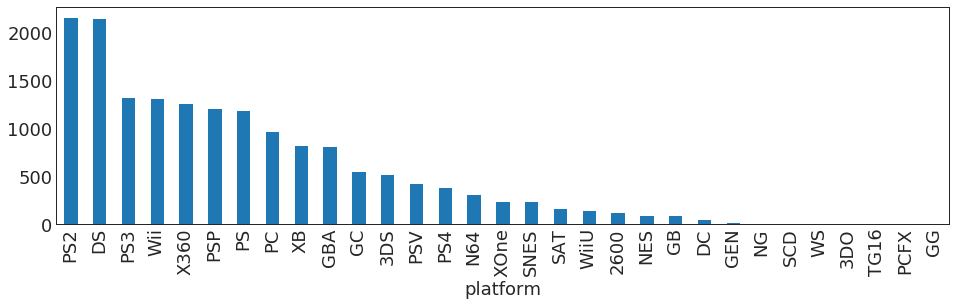

In [41]:
platforms_cnt_all = df_games.groupby('platform')['platform'].count().sort_values(ascending=False)
platforms_cnt_all.plot.bar(figsize=(16, 4))

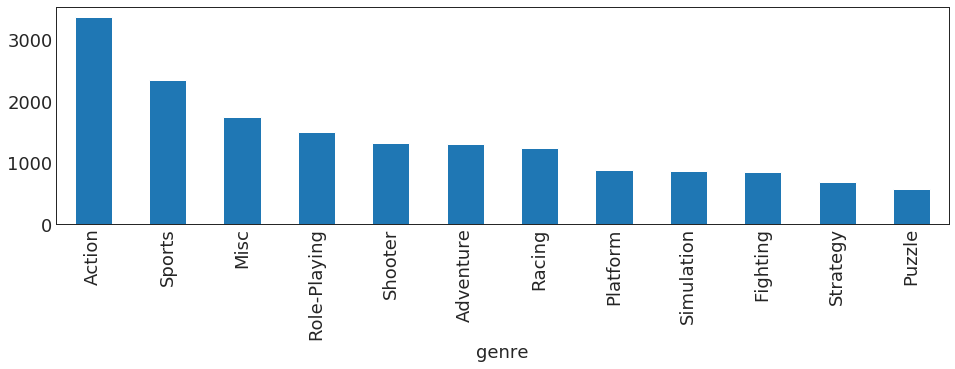

In [42]:
genres_cnt_all = df_games.groupby('genre')['genre'].count().sort_values(ascending=False)
genres_cnt_all.plot.bar(figsize=(16, 4))

Необычных значений не обнаружено

__Проверим колонку *year_of_release*__

In [43]:
empty_year_of_release = df_games[df_games['year_of_release'].isnull()]
display(empty_year_of_release.head(5))
print('Всего пустых значений совместно в поле year_of_release: ', empty_year_of_release.shape[0])
print('Процент данных с пустыми значениями: {:.0%}'.format(empty_year_of_release.shape[0] / df_games.shape[0]))

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  
183      0.26      0.01         0.71          94.0         8.5      E  
377      2.36      0.04         0.51          84.0         6.4      E  
456      0.97      0.00         0.29          74.0         7.9   E10+  
475      1.02      0.00         0.41           NaN         NaN    NaN  
609      0.14      0.00         0.03           NaN         NaN    NaN

Всего пустых значений совместно в поле year_of_release:  269
Процент данных с пустыми значениями: 2%


Посмотрим, идут ли года по порядку. Если строчки идут по порядку, то можно будет интуитивно заполнить пропуски.

In [44]:
df_games.loc[370:380]

name platform  \
370                             Spyro 2: Ripto's Rage!       PS   
371                                        Left 4 Dead     X360   
372  Donkey Kong Country 3: Dixie Kong's Double Tro...     SNES   
373                            Assassin's Creed: Unity     XOne   
374                                            Kung Fu      NES   
375                                    Resident Evil 5     X360   
376                      Assassin's Creed: Brotherhood     X360   
377                                   FIFA Soccer 2004      PS2   
378                                      Battlefield 4      PS3   
379                              Batman: Arkham Asylum     X360   
380                                      Battlefield 4     X360   

     year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
370           1999.0  Platform      2.14      1.21      0.01         0.17   
371           2008.0   Shooter      2.66      0.49      0.05         0.30   
372           1996.0  Platform      1.17      0.50      1.75         0.08   
373           2014.0    Action      2.27      0.90      0.00         0.33   
374           1985.0    Action      1.64      0.38      1.42         0.06   
375           2009.0    Action      2.11      0.93      0.12         0.34   
376           2010.0    Action      2.85      0.38      0.03         0.24   
377              NaN    Sports      0.59      2.36      0.04         0.51   
378           2013.0   Shooter      1.30      1.42      0.27         0.50   
379           2009.0    Action      2.20      0.95      0.02         0.31   
380           2013.0   Shooter      2.15      1.01      0.02         0.31   

     critic_score  user_score rating  
370           NaN         NaN    NaN  
371          89.0         7.9      M  
372           NaN         NaN    NaN  
373          72.0         4.1      M  
374           NaN         NaN    NaN  
375          83.0         7.5      M  
376          89.0         8.3      M  
377          84.0         6.4      E  
378          80.0         5.8      M  
379          92.0         8.7      T  
380          79.0         5.6      M

Гипотеза не оправдалась.    
Посомтрим распределение _year_of_release_ для платформ. Вдруг игры на приставки выходили в определенное время

In [45]:
df_games.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

year_of_release  1980.0  1981.0  1982.0  1983.0  1984.0  1985.0  1986.0  \
platform                                                                  
2600                9.0    46.0    36.0    11.0     1.0     1.0     2.0   
3DO                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3DS                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
DC                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
DS                  NaN     NaN     NaN     NaN     NaN     1.0     NaN   
GB                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GBA                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GC                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GEN                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GG                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
N64                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
NES                 NaN     NaN     NaN     6.0    13.0    11.0    19.0   
NG                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PC                  NaN     NaN     NaN     NaN     NaN     1.0     NaN   
PCFX                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PS                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PS2                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PS3                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PS4                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PSP                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PSV                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
SAT                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
SCD                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
SNES                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
TG16                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
WS                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Wii                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
WiiU                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
X360                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
XB                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
XOne                NaN     NaN     NaN     NaN     NaN     NaN     NaN   

year_of_release  1987.0  1988.0  1989.0  ...  2007.0  2008.0  2009.0  2010.0  \
platform                                 ...                                   
2600                6.0     2.0     2.0  ...     NaN     NaN     NaN     NaN   
3DO                 NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
3DS                 NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
DC                  NaN     NaN     NaN  ...     1.0     1.0     NaN     NaN   
DS                  NaN     NaN     NaN  ...   376.0   492.0   403.0   323.0   
GB                  NaN     1.0    10.0  ...     NaN     NaN     NaN     NaN   
GBA                 NaN     NaN     NaN  ...     6.0     NaN     NaN     NaN   
GC                  NaN     NaN     NaN  ...     4.0     NaN     NaN     NaN   
GEN                 NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
GG                  NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
N64                 NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
NES                10.0    11.0     5.0  ...     NaN     NaN     NaN     NaN   
NG                  NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
PC                  NaN     1.0     NaN  ...    62.0    76.0   107.0    90.0   
PCFX                NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
PS                  NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
PS2                 NaN     NaN     NaN  ...   214.0   191.0    96.0    38.0   
PS3 

Видим, что игры для одной и той же платформы выходили в продолжительное время, поэтому заменить значения не получится.   
Проверим распределение указанных игр по жанрам и приставкам.

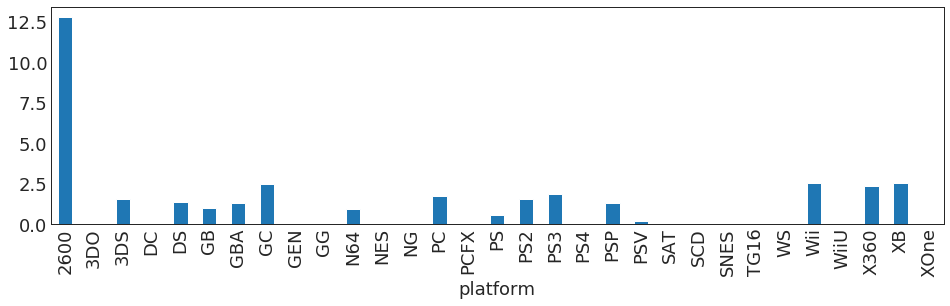

In [46]:
(empty_year_of_release.groupby('platform')['platform'].count() / platforms_cnt_all * 100).plot.bar(figsize=(16, 4))

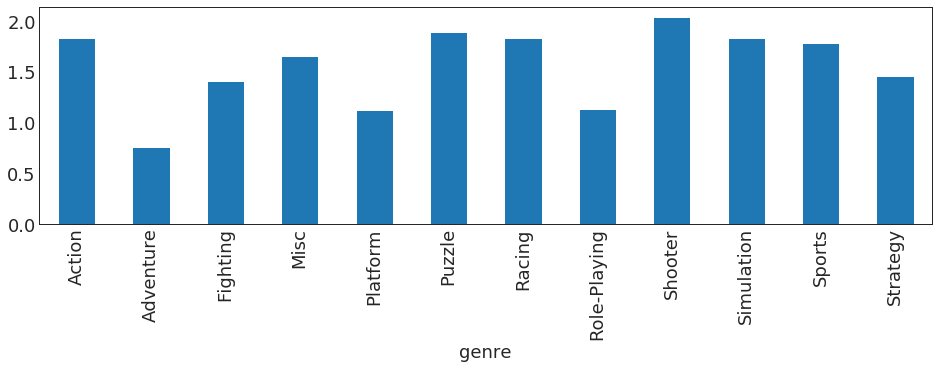

In [47]:
(empty_year_of_release.groupby('genre')['genre'].count() / genres_cnt_all * 100).plot.bar(figsize=(16, 4))

Видим, что для большинства жанров и платформ указанные данные составляют 1-2,5%. Только для платформы *2600* в 12% случаев не указан год выпуска игр. Это значительно, но с учетом того, что это старая платформа, и с учетом нашей задачи (что мы видим выше при анализе таблицы платформа-год), удалим указанные строки.

Перед удалением проверим распределение по годам.

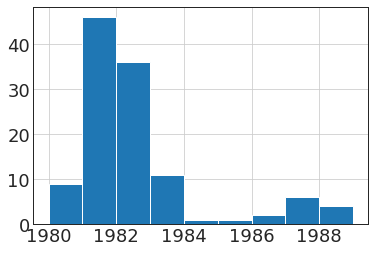

In [48]:
df_games[df_games['platform'] == '2600']['year_of_release'].hist(bins=9)

Видно, что нет выпадающего года, поэтому данное отсутсвие значений для указанной платформы неочевидно.

In [49]:
# Удалим значения
df_games.dropna(subset=['year_of_release'], inplace=True)
print('Новая размерность: ', df_games.shape[0])

Новая размерность:  16444


__Проверим колонки *critic_score, user_score*__

Выведем статистику по всем колонкам

In [50]:
df_games[['critic_score', 'user_score']].isna().agg(['sum'])

critic_score  user_score
sum          8461        8981

Проверим значения во всех обозначенных колонках одновременно

In [51]:
empty_scores = df_games[df_games[['critic_score', 'user_score']].isnull().all(axis=1)]
display(empty_scores.head(5))
print('Всего пустых значений совместно в полях critic_score, user_score: ', empty_scores.shape[0])
print('Процент данных с пустыми значениями: {:.0%}'.format(empty_scores.shape[0] / df_games.shape[0]))
print('Всего пустых уникальных значений совместно в полях critic_score, user_score: ', len(empty_scores['name'].unique()))

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN

Всего пустых значений совместно в полях critic_score, user_score:  7892
Процент данных с пустыми значениями: 48%
Всего пустых уникальных значений совместно в полях critic_score, user_score:  6712


48% данных содержат пустые значения в полях с рейтингами. Причем данные игры обладают значительными продажами (максимальные значения для NA и EU рынков 41.35 и 28.96 соответсвенно). Что делать?   
Давайте посмотрим, чем отличаются данные значения

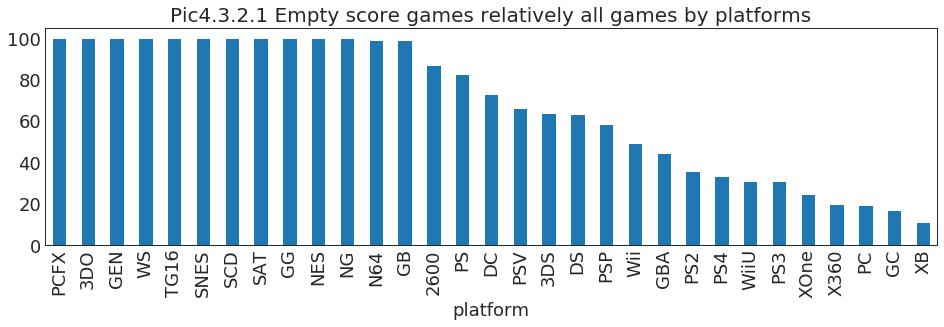

In [52]:
((empty_scores.groupby('platform')['platform'].count() / platforms_cnt_all * 100)
 .sort_values(ascending=False)
 .plot.bar(figsize=(16, 4)))
plt.title('Pic4.3.2.1 Empty score games relatively all games by platforms', fontsize=20)
plt.show()

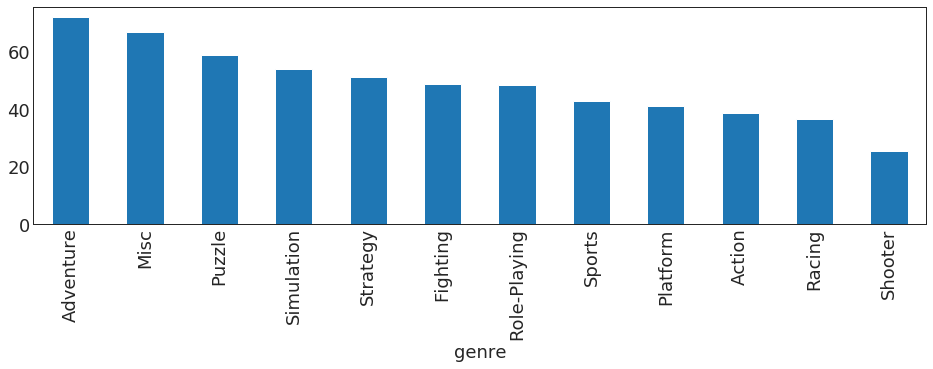

In [53]:
((empty_scores.groupby('genre')['genre'].count() / genres_cnt_all * 100).sort_values(ascending=False).plot.bar(figsize=(16, 4)))

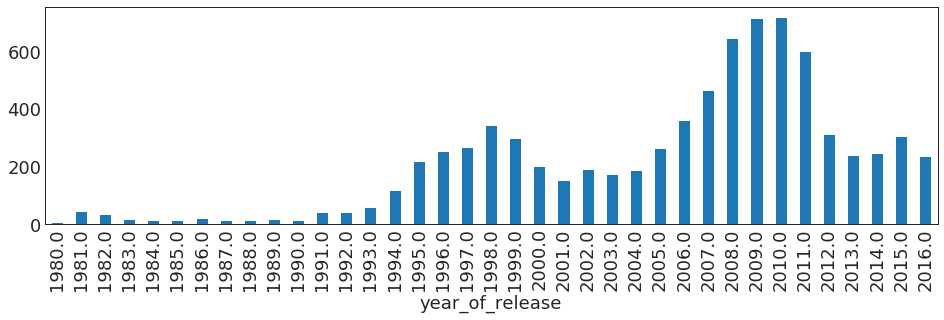

In [54]:
(empty_scores.groupby('year_of_release')['year_of_release'].count()).plot.bar(figsize=(16, 4))

__Видно, что при удалении строк с отсутсвующими значениями critic_score и user_score лишимся анализа по большому количеству платформ и, возможно, исказим показатели продаж для остальных платформ. Аналогичная проблема с искажениями будет при замене значений на среднее/медианное значение. Поэтому пока оставим указанные значения пустыми до дальнейших шагов анализа.__     

__!Также зафиксируем данные наблюдения для обсуждения с коллегами о причинах отсутствия данных!__  

Потенциально для ряда платформ можно заменить значения на основе характерного для указанных значений распределений с учетом стандартного отклонения и среднего значения.   

Также, как показано ниже, около 500 значений можно заменить используя рейтинг с других платформ.

In [55]:
# Попробуем найти аналогичные игры с пропущенными значениями на другие консоли, у которых указан рейтинг
names_of_empty_scores = empty_scores['name'].to_list()
names_of_alternative_scores = df_games[(df_games['name'].isin(names_of_empty_scores)) & (df_games[['critic_score', 'user_score']].notnull().any(axis=1))]
display(names_of_alternative_scores.head(5))
print('Всего уникальных значений имен, рейтинг которых имеется для другх платформ: ',
      len(names_of_alternative_scores['name'].unique()))

name platform  year_of_release         genre  \
60           Call of Duty: Ghosts     X360           2013.0       Shooter   
69           Call of Duty: Ghosts      PS3           2013.0       Shooter   
75    The Elder Scrolls V: Skyrim     X360           2011.0  Role-Playing   
113  Need for Speed Underground 2      PS2           2004.0        Racing   
126                       FIFA 14      PS3           2013.0        Sports   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
60       6.73      2.56      0.04         0.91          73.0         2.6   
69       4.10      3.63      0.38         1.25          71.0         2.6   
75       5.05      2.79      0.10         0.85          96.0         8.4   
113      2.71      3.02      0.08         1.09          82.0         8.6   
126      0.78      4.24      0.07         1.37          86.0         4.3   

    rating  
60       M  
69       M  
75       M  
113      E  
126      E

Всего уникальных значений имен, рейтинг которых имеется для другх платформ:  529


__Проверим колонку *rating*__

In [56]:
empty_ratings = df_games[df_games['rating'].isnull()]
display(empty_ratings.head(5))
print('Всего пустых значений: ', empty_ratings.shape[0])
print('Процент данных с пустыми значениями: {:.0%}'.format(empty_ratings.shape[0] / df_games.shape[0]))
print('Всего пустых уникальных значений: ', len(empty_ratings['name'].unique()))

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN

Всего пустых значений:  6676
Процент данных с пустыми значениями: 41%
Всего пустых уникальных значений:  5776


41% данных содержат пустые значения в полях с возрастным цензором.  
Давайте посмотрим, чем отличаются данные значения

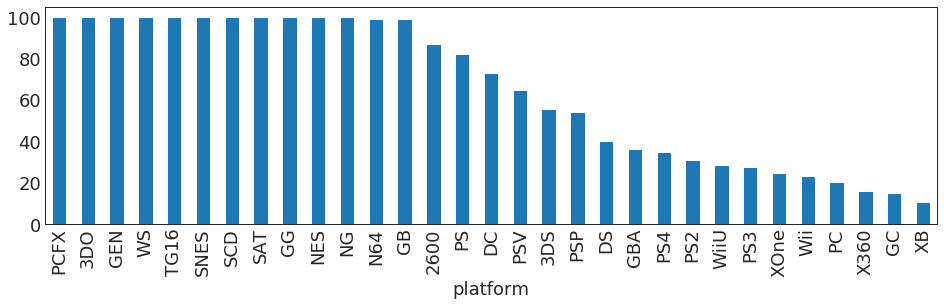

In [57]:
((empty_ratings.groupby('platform')['platform'].count() / platforms_cnt_all * 100)
 .sort_values(ascending=False)
 .plot.bar(figsize=(16, 4)))

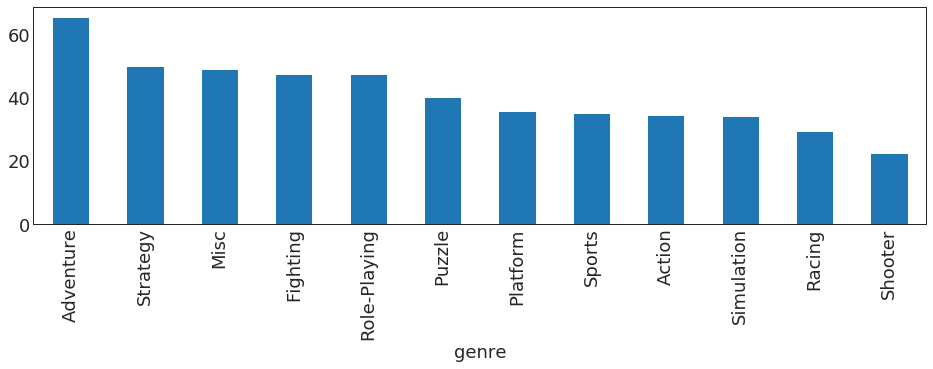

In [58]:
(empty_ratings.groupby('genre')['genre'].count() / genres_cnt_all * 100).sort_values(ascending=False).plot.bar(figsize=(16, 4))

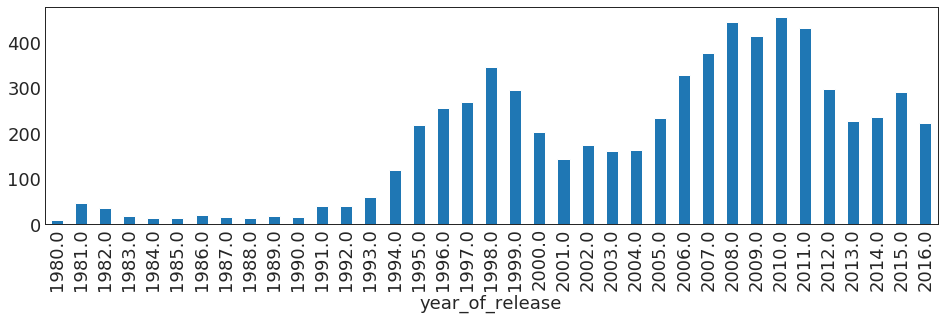

In [59]:
(empty_ratings.groupby('year_of_release')['year_of_release'].count()).plot.bar(figsize=(16, 4))

Никаких явных кореляций не обнаружено

In [60]:
# Проверим наличие нестандартных пропусков
display(df_games[df_games['rating'].str.lower().isin(blank_nonstandart)])
print('Всего нестандартных пропусков в rating: ', df_games['rating'].isin(blank_nonstandart).sum())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Всего нестандартных пропусков в rating:  0


In [61]:
df_games.groupby('rating')['rating'].count()

rating
AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905
Name: rating, dtype: int64

Есть ряд редких рейтингов ['AO', 'EC', 'K-A', 'RP']. Указанные рейтинги существуют (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board). Причем __K-A можно заменить на E__, а __RP__ - рейтинг ожидается (впоследствии при анализ данный рейтинг можно не учитывать).

In [62]:
rare_ratings = ['AO', 'EC', 'K-A', 'RP']

In [63]:
df_games[df_games['rating'].isin(rare_ratings)]

name platform  \
656                                     Theme Hospital       PC   
875                      Grand Theft Auto: San Andreas       XB   
903                                 PaRappa The Rapper       PS   
4297                         Nickelodeon Team Umizoomi       DS   
5034          Sesame Street: Elmo's A-to-Zoo Adventure      Wii   
6046         Sesame Street: Cookie's Counting Carnival      Wii   
6764   Dora the Explorer: Journey to the Purple Planet      PS2   
7586           Ni Hao, Kai-lan: New Year's Celebration       DS   
9960   Dora the Explorer: Journey to the Purple Planet       GC   
13065        Sesame Street: Cookie's Counting Carnival       PC   
13455         Sesame Street: Elmo's A-to-Zoo Adventure       PC   
14270                          Supreme Ruler: Cold War       PC   
16681                                          Worms 2       PC   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
656             1997.0   Strategy      2.30      0.10      0.00         0.00   
875             2005.0     Action      1.26      0.61      0.00         0.09   
903             1996.0       Misc      0.26      0.16      1.46         0.03   
4297            2011.0     Action      0.42      0.00      0.00         0.03   
5034            2010.0       Misc      0.35      0.00      0.00         0.02   
6046            2010.0       Misc      0.27      0.00      0.00         0.02   
6764            2005.0  Adventure      0.12      0.09      0.00         0.03   
7586            2009.0       Misc      0.19      0.00      0.00         0.01   
9960            2005.0  Adventure      0.09      0.02      0.00         0.00   
13065           2010.0       Misc      0.05      0.00      0.00         0.00   
13455           2010.0       Misc      0.04      0.00      0.00         0.00   
14270           2011.0   Strategy      0.00      0.03      0.00         0.01   
16681           1997.0   Strategy      0.00      0.01      0.00         0.00   

       critic_score  user_score rating  
656             NaN         9.0    K-A  
875            93.0         8.6     AO  
903            92.0         7.4    K-A  
4297            NaN         NaN     EC  
5034            NaN         NaN     EC  
6046            NaN         NaN     EC  
6764            NaN         7.0     EC  
7586            NaN         NaN     EC  
9960            NaN         NaN     EC  
13065           NaN         NaN     EC  
13455           NaN         NaN     EC  
14270          63.0         6.8     RP  
16681           NaN         8.1    K-A

In [64]:
df_games.loc[df_games['rating'] == 'K-A', 'rating'] = 'E'

In [65]:
# Проверка
df_games.groupby('rating')['rating'].count()

rating
AO         1
E       3924
E10+    1393
EC         8
M       1536
RP         1
T       2905
Name: rating, dtype: int64

__!Зафиксируем данные наблюдения для обсуждения с коллегами о причинах отсутствия данных!__

__Проверим колонки *na_sales, eu_sales, jp_sales, other_sales*__

Выведем статистику по всем колонкам

In [66]:
df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].isna().agg(['sum'])

na_sales  eu_sales  jp_sales  other_sales
sum         0         0         0            0

Проверим значения во всех обозначенных колонках одновременно

In [67]:
empty_sales = df_games[df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].isnull().all(axis=1)]
display(empty_sales.head(5))
print('Всего пустых значений совместно в полях na_sales, eu_sales, jp_sales, other_sales: ', empty_sales.shape[0])
print('Процент данных с пустыми значениями: {:.0%}'.format(empty_sales.shape[0] / df_games.shape[0]))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Всего пустых значений совместно в полях na_sales, eu_sales, jp_sales, other_sales:  0
Процент данных с пустыми значениями: 0%


Видим, что значения продаж есть для всех колонок. Проверим строчки, в которых продажи равны 0 во всех регионах.

In [68]:
df_games[(df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] == 0).all(axis=1)]

name platform  \
16676                                  G1 Jockey 4 2008      PS3   
16709  SCORE International Baja 1000: The Official Game      PS2   

       year_of_release   genre  na_sales  eu_sales  jp_sales  other_sales  \
16676           2008.0  Sports       0.0       0.0       0.0          0.0   
16709           2008.0  Racing       0.0       0.0       0.0          0.0   

       critic_score  user_score rating  
16676           NaN         NaN    NaN  
16709           NaN         NaN    NaN

Всего 2 значения с отсутствующим рейтингом.   
На распределение они не повлияют, при этом выглядят как выбросы, поэтому удалим их.

In [69]:
df_games.drop(df_games[(df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] == 0).all(axis=1)].index, inplace=True)
df_games.reset_index(drop=True, inplace=True)

__В результате подготовки данных имеем почищенные данные с присутствием ряда Null/NaN значений в колонка с рейтингами (оставляем до последующего анализа)__

In [70]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 11 columns):
name               16442 non-null object
platform           16442 non-null object
year_of_release    16442 non-null float64
genre              16442 non-null object
na_sales           16442 non-null float64
eu_sales           16442 non-null float64
jp_sales           16442 non-null float64
other_sales        16442 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### 4.4. Sale summary for all regions

In [71]:
df_games['all_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head(5)

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  all_sales  
0     28.96      3.77         8.45          76.0         8.0      E      82.54  
1      3.58      6.81         0.77           NaN         NaN    NaN      40.24  
2     12.76      3.79         3.29          82.0         8.3      E      35.52  
3     10.93      3.28         2.95          80.0         8.0      E      32.77  
4      8.89     10.22         1.00           NaN         NaN    NaN      31.38

## 5. Exploratory data analysis

### 5.1. Released games during different years

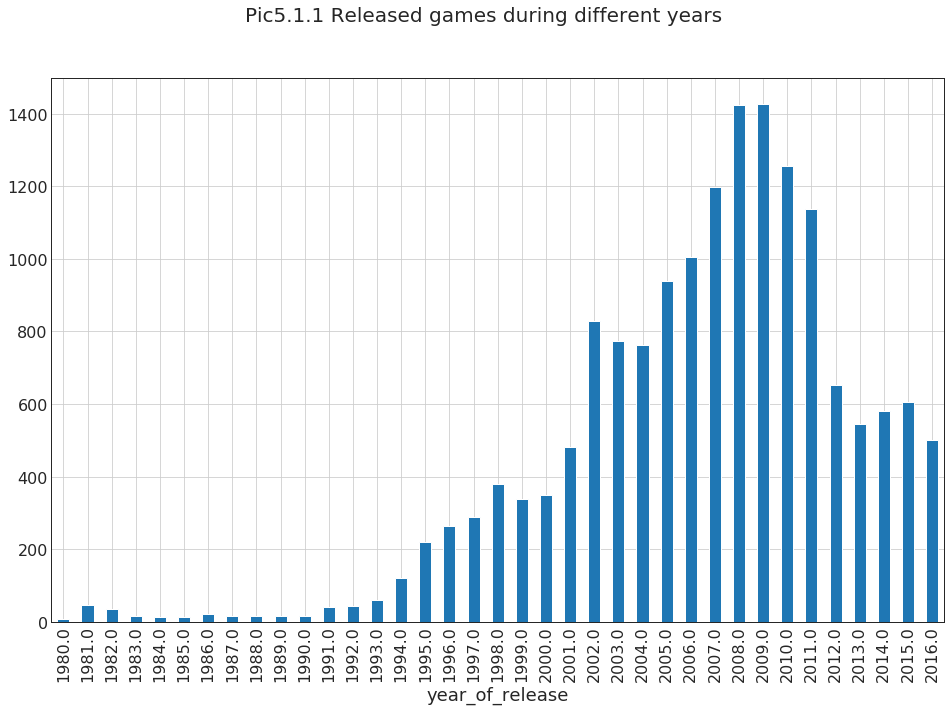

In [72]:
df_games.groupby('year_of_release')['year_of_release'].count().plot.bar(figsize=(16, 10),
                                                                        grid=True,
                                                                        fontsize=16
                                                                       )
plt.suptitle('Pic5.1.1 Released games during different years', fontsize=20)
plt.show()

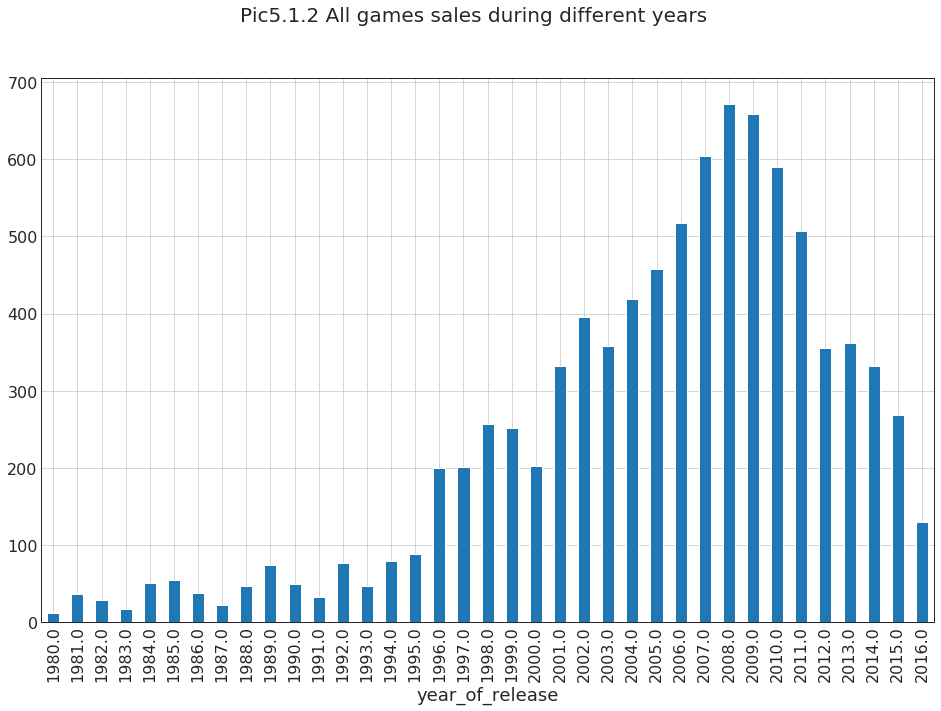

In [73]:
df_games.groupby('year_of_release')['all_sales'].sum().plot.bar(figsize=(16, 10),
                                                                        grid=True,
                                                                        fontsize=16
                                                                       )
plt.suptitle('Pic5.1.2 All games sales during different years', fontsize=20)
plt.show()

In [74]:
print(f'Коэффициент корреляции Пирсона для зависимости количество выпущенных игр-продажи:')
print(round(df_games.groupby('year_of_release')['year_of_release'].count()
            .corr(df_games.groupby('year_of_release')['all_sales'].sum()), 2))

Коэффициент корреляции Пирсона для зависимости количество выпущенных игр-продажи:
0.98


Данные за все периоды важны для отслеживания временных тенденций, циклов, так как задача: "нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании".   
Возможно, есть смысл не рассматривать данные до 1995 года из-за небольшого количества выборки относительно других годов и большой вероятности влияния выбросов на аналитику. Запомним данный момент для последующего анализа.   
__Также обратим внимание, что количество выпущеных игр и продажи находятся в прямой корреляции__

### 5.2. Sales analysis in relation to platforms

Посмотрим суммарные продажи по всем платформам

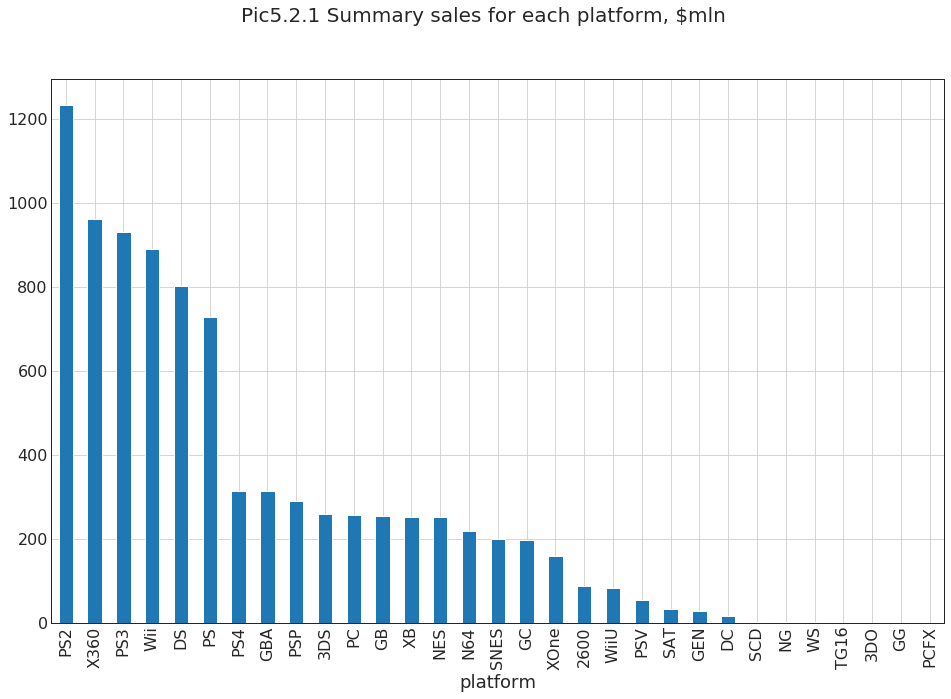

In [75]:
df_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(16, 10),
                                                                                      grid=True,
                                                                                      fontsize=16
                                                                                     )
plt.suptitle('Pic5.2.1 Summary sales for each platform, $mln', fontsize=20)
plt.show()

Видно, что платформы с продажами более 500$ млн. можно выделить как платформы с наибольшими суммарными продажами.   
Выберем их.

In [76]:
popular_platforms = df_games.groupby('platform').agg({'all_sales': 'sum'}).query("all_sales > 500")
popular_platforms

all_sales
platform           
DS           802.78
PS           727.58
PS2         1233.56
PS3          931.34
Wii          891.18
X360         961.24

Теперь посмотрим на распределение продаж для каждой из этих платформ

In [77]:
def set_axes(axes, x, y1, ax1label, y1lable, ytitle, xtitle,
             y2=None, ax2label=None, y2label=None, xfontsize=18, yrange=None, y2range=None, labelrotation=0):
    """
    Функция оформления осей столбчатых диаграмм
    """
    axes.set_title(ytitle, fontdict={'fontsize': 20})
    axes.set_xlabel(xtitle, fontsize=18)
    axes.grid(zorder=0)
    
    axes.bar(x, y1, label=y1lable)
    axes.set_ylabel(y1lable, fontsize=18, color='blue')
    axes.tick_params(axis='y', which='major', labelsize=18)
    axes.tick_params(axis='x', which='major', labelsize=xfontsize, labelrotation=labelrotation)
    if yrange is not None:
        axes.set_ylim(yrange)
    
    if y2 is not None and y2label is not None and ax2label is not None:
        axes2 = axes.twinx()
        if y2range is not None:
            axes2.set_ylim(y2range)
        axes2.bar(x, y2, alpha=0.4, color='grey', label='Counts')
        axes2.tick_params(axis='both', which='major', labelsize=18)
        axes2.set_ylabel(y2label, fontsize=18, color='grey')  

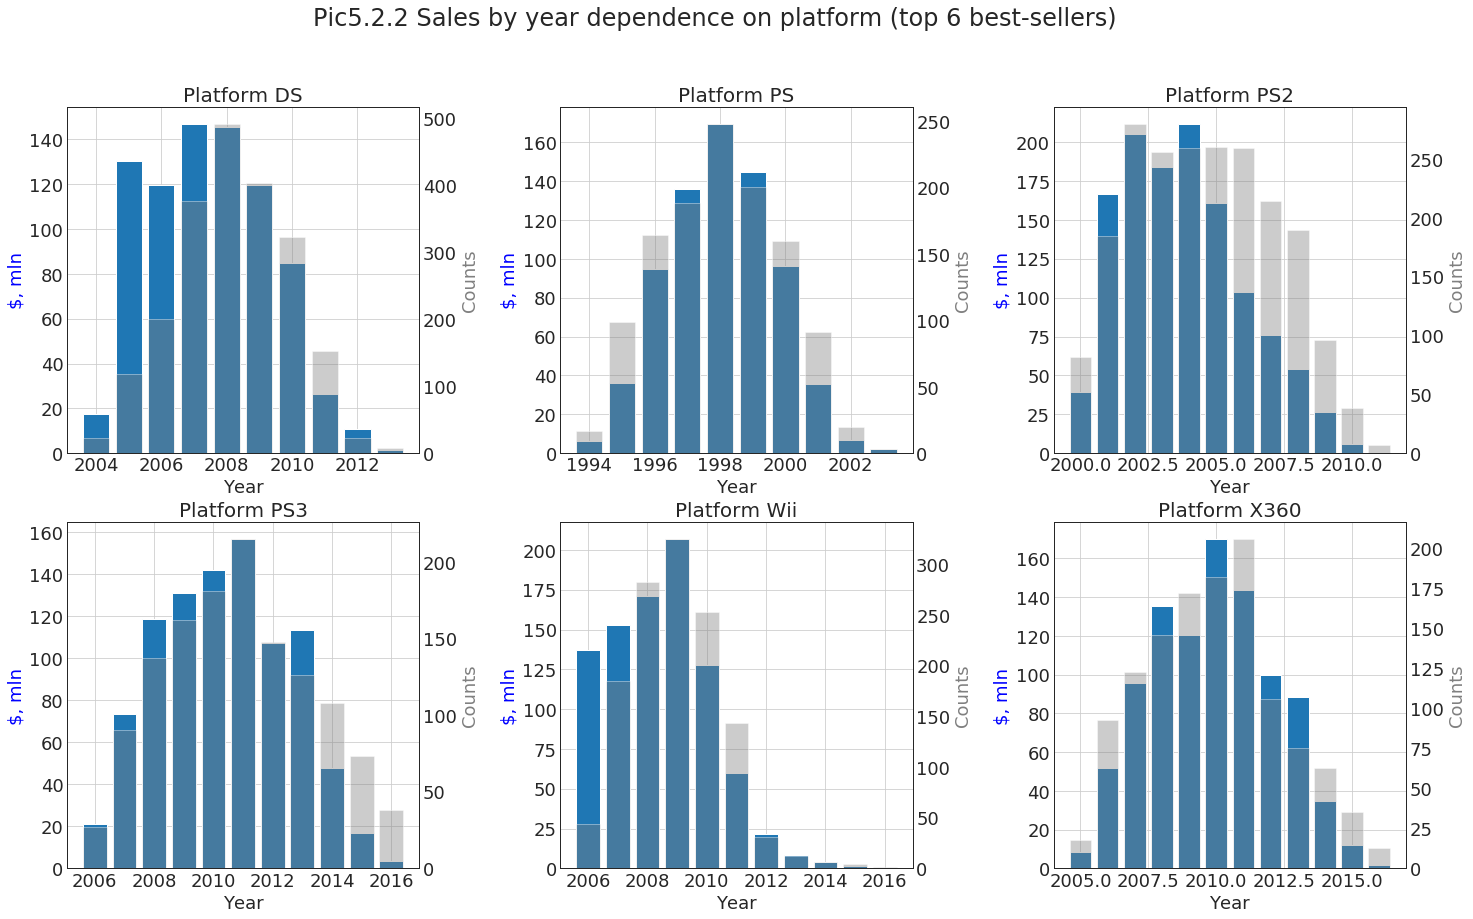

In [78]:
nrows = int(len(popular_platforms.index) / 3)
ncols = 3

# Сохраним пиковые года продаж для платформ для анализа
platforms_sales_peak_year = {}

# Для 6 платформ - 6 подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
for idx, name in enumerate(popular_platforms.index):
    i = int(idx // ncols)
    j = int(idx % ncols)
    
    # Создадим DataFrame по каждой платформе с данными по продажам за каждый год
    platform_by_years = (
        df_games
        .query("platform == @name")
        .groupby('year_of_release')['all_sales']
        .agg({'sum', 'count'})
        .query("sum > 0.1") # Чтобы отфильтровать незначительные продажи в различные года (которые только размоют общую картину)
    )
    
    # Зададим оси
    set_axes(axes=axes[i, j],
             x=platform_by_years.index,
             y1=platform_by_years['sum'],
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'Platform {name}',
             xtitle='Year',
             y2=platform_by_years['count'],
             ax2label='Counts',
             y2label='Counts'
            )
    
    # Сохраним год, когда были пиковые продажи, также год начала продаж для данной платформы и год конца продаж
    platforms_sales_peak_year[name] = [platform_by_years[platform_by_years['sum'] == platform_by_years['sum'].max()].index[-1],
                                      platform_by_years.index.min(),
                                      platform_by_years.index.max()]

# Выведем на экран результаты
fig.suptitle('Pic5.2.2 Sales by year dependence on platform (top 6 best-sellers)', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

In [79]:
# Обернем данные по пиковым продажам в словарь
best_sellers_paltform_years = pd.DataFrame.from_dict(platforms_sales_peak_year,
                                                     orient='index',
                                                     columns=['peak', 'start', 'last'])
best_sellers_paltform_years['years_to_peak'] = best_sellers_paltform_years['peak'] - best_sellers_paltform_years['start'] + 1
display(best_sellers_paltform_years)
print('На какой год в среднем приходится пик продаж для платформы:', best_sellers_paltform_years['years_to_peak'].mean())
print('На какой год приходится медианный пик продаж для платформы:', best_sellers_paltform_years['years_to_peak'].median())
print('На какой год минимально приходится пик продаж для платформы:', best_sellers_paltform_years['years_to_peak'].min())

peak   start    last  years_to_peak
DS    2007.0  2004.0  2013.0            4.0
PS    1998.0  1994.0  2003.0            5.0
PS2   2004.0  2000.0  2011.0            5.0
PS3   2011.0  2006.0  2016.0            6.0
Wii   2009.0  2006.0  2016.0            4.0
X360  2010.0  2005.0  2016.0            6.0

На какой год в среднем приходится пик продаж для платформы: 5.0
На какой год приходится медианный пик продаж для платформы: 5.0
На какой год минимально приходится пик продаж для платформы: 4.0


__Популярные платформы в прошлом - PS__ (период популярность: 1994 - 2003 - 10 лет), __PS2__ (2000 - 2011 - 12 лет), __DS__ (2004 - 2013 - 10 лет), __Wii__ (2006 - 2015 - 10 лет).   
Характерным периодом появления иисчезновения платформ можно назвать __10 лет__ (как медианное от указанных или меньшее из указанных, чтобы впоследствии "перестраховаться"). При этом на __пик__ продаж платформы __выходят на 4-5 год__.

### 5.3. Determine period for analysis

Еще раз посмотрим на распределение игр из года в год.

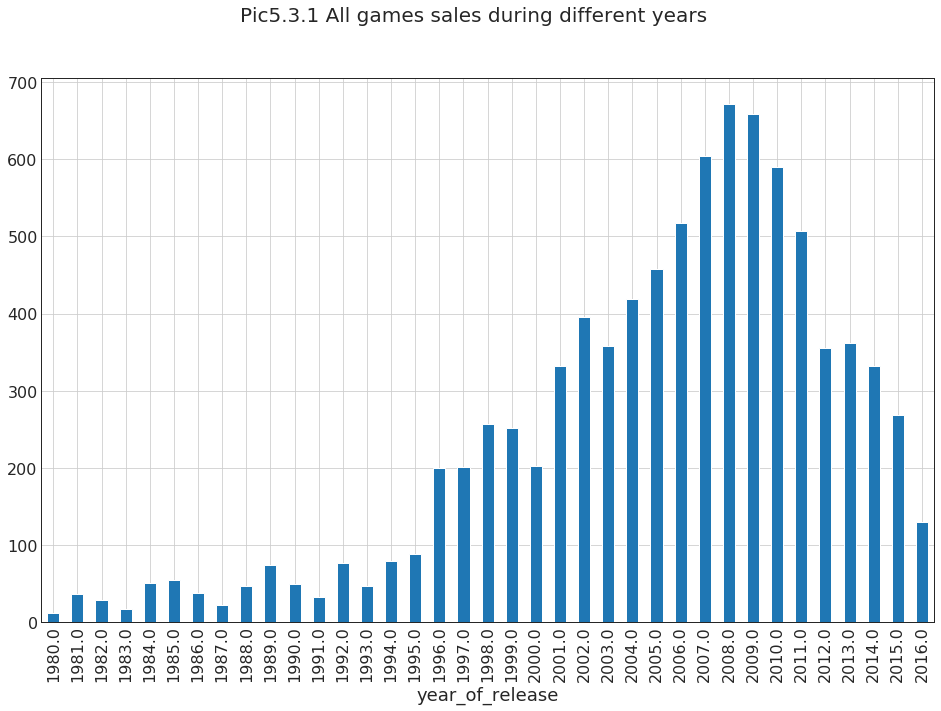

In [80]:
df_games.groupby('year_of_release')['all_sales'].sum().plot.bar(figsize=(16, 10),
                                                                        grid=True,
                                                                        fontsize=16
                                                                       )
plt.suptitle('Pic5.3.1 All games sales during different years', fontsize=20)
plt.show()

На рис.5.3.1. выделяется 4 этапа развития индустрии:
* Зарождение индустрии с 1980 по 1995 гг
* Выход на пик с 1996 по 2007 гг
* Пик продаж с 2008 по 2009 гг
* Спад продаж с 2010 по 2016 гг  

Выделим последний этап развития индустрии для анализа как наиболее приближенного к текущим реалиям.

Также обратим внимание, что ряд платформ могут не быть актуальными в 2016 и последующих годах в связи с отсутсвием продаж игр для них. Поэтому выделим те платформы, которые имели продажи в 2016 году.

In [81]:
platform_popularity_periods = df_games.groupby('platform').agg({'year_of_release': ['min', 'max']})
up_to_date_platforms = platform_popularity_periods[platform_popularity_periods['year_of_release']['max'] == 2016].index

In [82]:
up_to_date_platforms

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

Странное поведение платформ наблюдается в 2016 году. Ощущение, что приставки были не популярны в этот год и их цикл популярности закончился (PS3 и X360), либо имеются искажения в данных. При этом раннее было выявлено (см. Pic5.1.1), что количество игр, выпущенных 2012 - 2016 годах приблизительно одинаково (в среднем 500).    
Давайте посомтрим на распределение среднего дохода от продаж от 1 игры.

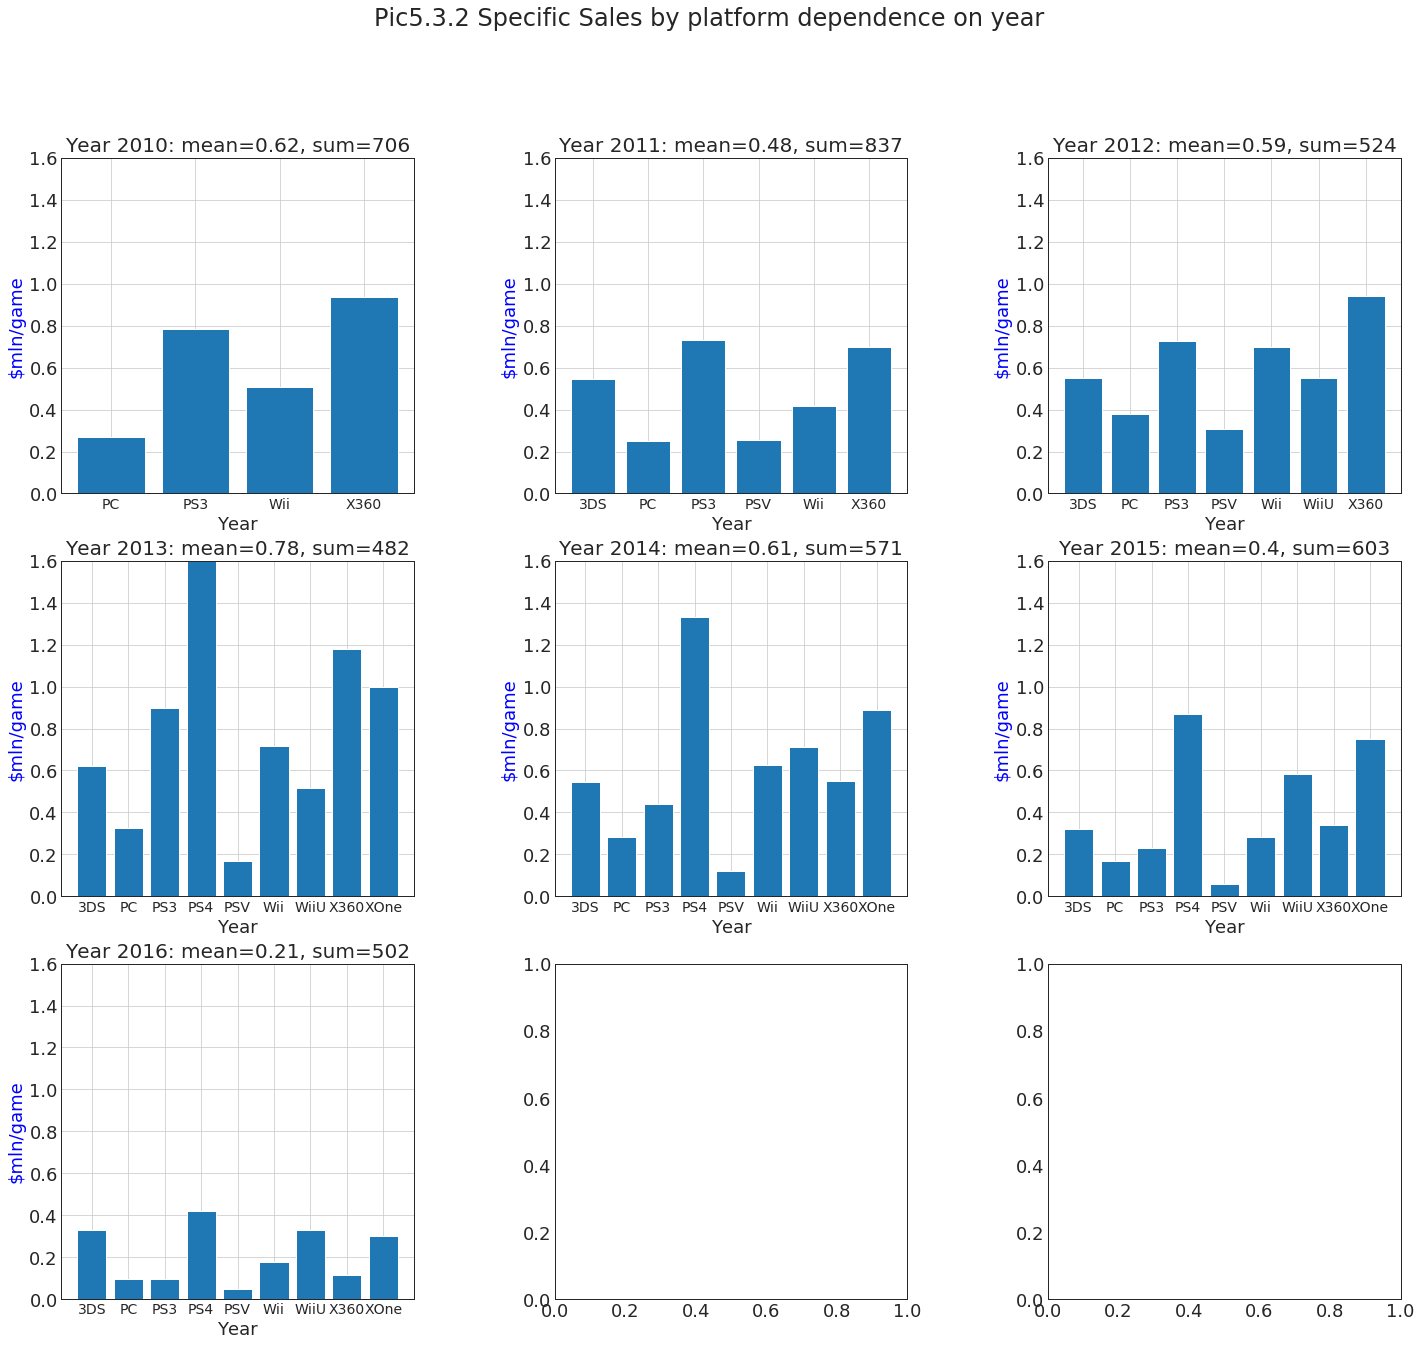

In [83]:
years_to_show = [2010+i for i in range(0, 7)]
nrows = int((len(years_to_show) + 2) / 3)
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
mean_sales_year_value = []
for idx, year in enumerate(years_to_show):
    i = int(idx // ncols)
    j = int(idx % ncols)
    
    platforms_by_year = (
        df_games
        .query("year_of_release == @year and platform in @up_to_date_platforms")
        .groupby('platform')['all_sales']
        .agg({'sum', 'count'})
    )
    platforms_by_year['specific'] = platforms_by_year['sum'] / platforms_by_year['count']
    mean_sales_year_value.append(round(platforms_by_year['specific'].mean(), 2))
    count_in_year = platforms_by_year['count'].sum()
    
    set_axes(axes=axes[i, j],
             x=platforms_by_year.index,
             y1=platforms_by_year['specific'],
             ax1label='Specific values',
             y1lable='$mln/game',
             ytitle=f'Year {year}: mean={mean_sales_year_value[-1]}, sum={count_in_year}',
             xtitle='Year',
             xfontsize=14,
             yrange=(0, 1.6) # Зададим общий масштаб оси "y" для анализа
            )

fig.suptitle('Pic5.3.2 Specific Sales by platform dependence on year', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

Видим, что удельные продажи сильно упали в 2016 году, что довольно странно.    
Также данную зависимость отражает график медианных значений удельных продаж за различные года: 

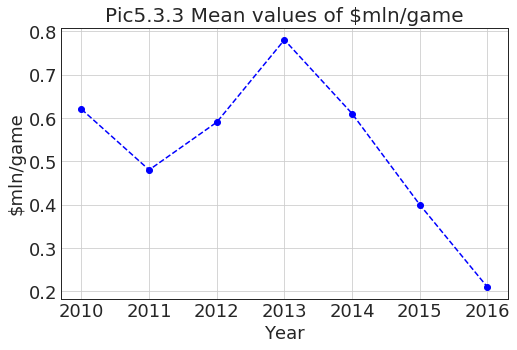

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(years_to_show, mean_sales_year_value, 'o--', color='blue')
plt.ylabel('$mln/game', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.title('Pic5.3.3 Mean values of $mln/game', fontsize=20)
plt.show()

Посомтрим также на распределение продаж __PS4 и XOne__. Судя по Pic.5.3.1, данные платформы ожидаются быть в лидерах в ближайшие годы.

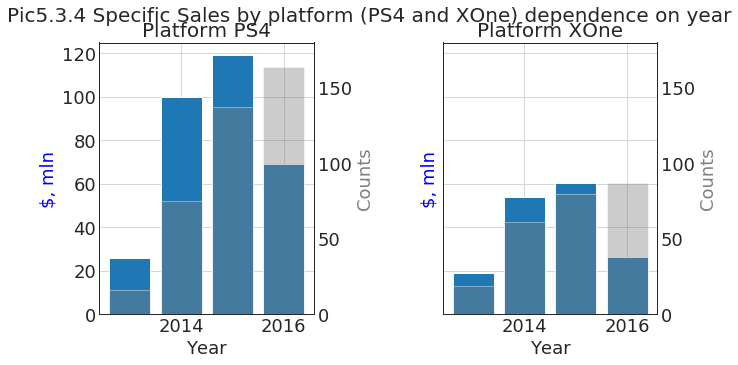

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
for idx, name in enumerate(['PS4', 'XOne']):
    
    platform_by_years = (
        df_games
        .query("platform == @name")
        .groupby('year_of_release')['all_sales']
        .agg({'sum', 'count'})
    )
    
    set_axes(axes=axes[idx],
             x=platform_by_years.index,
             y1=platform_by_years['sum'],
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'Platform {name}',
             xtitle='Year',
             y2=platform_by_years['count'],
             ax2label='Counts',
             y2label='Counts',
             y2range=(0, 180)
            )
    
    
fig.suptitle('Pic5.3.4 Specific Sales by platform (PS4 and XOne) dependence on year', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()

Судя по данным на Pic5.2.2 и Pic5.3.3, __PS3 и X360__ переживают свой закат популярности в 2016 году (ось Counts, к тому же они сущесивуют на рынке 11 и 12 лет соответсвенно, что также говорит о возможном спаде популярности), когда как __PS4 и XOne__ набирают популярность.    
2016 год на основании Pic5.3.1 - Pic5.3.3 явялется аномальным - прослеживается резкое падение прибыли от продаж игр при сохранении/нарастании выпускаемых игр.   
__Исходя из этого, предлагаю исключить 2016 год из рассмотрения и зафиксировать данные наблюдения для обсуждения с коллегами о причинах такого распределения.__   
__Также далее в рассмотрении будут учитываться только актуальные платформы в период падения рынка (с 2010 года)__

__На основании главы 5.3. впоследсвии будем рассматривать данные актуальных платформ в период с 2010 по 2016 год (промежуток в 7 лет) для мониторинга продаж (при этом количество выпущенных игры за 2016 год не выглядит странным, поэтому иногда будем исключать 2016 год из рассмотрения).__ Для анализа тенденций за цикл популярности платформ будем брать период в 7 лет, для прогноза на ближащие годы будем брать период 4-5 лет (время выхода платформы на пик популярности).

In [86]:
df_games_cut = df_games.query('2010 <= year_of_release <= 2016 and platform in @up_to_date_platforms')

### 5.4. Determine potentially profitable platform

Посмотрим на периоды популярности платформ и выберем те, для которых игры выходили в 2016 году и их популярность не превышает 10 лет (учтем также, что на пик с вреднем платформы выходят за 4-5 лет - из раздела 5.2)

In [87]:
platform_popularity_periods['delta'] = (platform_popularity_periods['year_of_release']['max'] 
                                        - platform_popularity_periods['year_of_release']['min'] + 1)
promising_platforms = platform_popularity_periods[(platform_popularity_periods['year_of_release']['max'] == 2016) &
                                   (platform_popularity_periods['delta'] <= 7)]
print('Table5.4.1. Most promissing platforms')
display(promising_platforms)
print('Mean period of popularity: ', round(promising_platforms['delta'].mean(), 2))
print('Median period of popularity: ', round(promising_platforms['delta'].median(), 2))

Table5.4.1. Most promissing platforms


year_of_release         delta
                     min     max      
platform                              
3DS               2011.0  2016.0   6.0
PS4               2013.0  2016.0   4.0
PSV               2011.0  2016.0   6.0
WiiU              2012.0  2016.0   5.0
XOne              2013.0  2016.0   4.0

Mean period of popularity:  5.0
Median period of popularity:  5.0


Выведем графики продаж и выпущенных игр для данных платформ

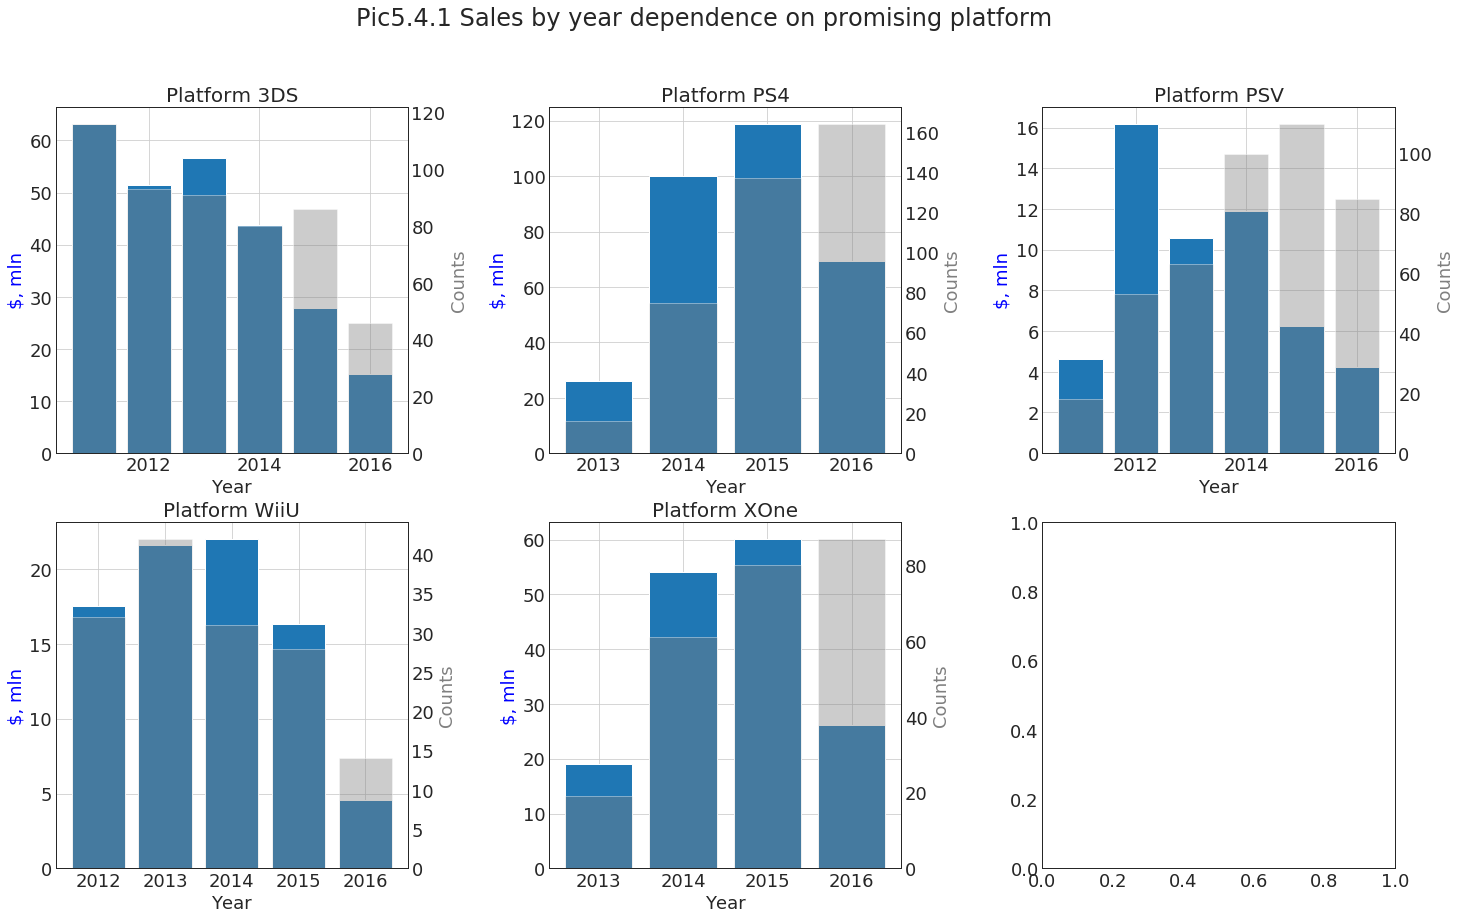

In [88]:
nrows = int((len(promising_platforms.index) + 2) / 3) # +2, чтобы симмитировать ceil
ncols = 3

# Сохраним пиковые года продаж для платформ для анализа
platforms_sales_peak_year = {}

# Для 6 платформ - 6 подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
for idx, name in enumerate(promising_platforms.index):
    i = int(idx // ncols)
    j = int(idx % ncols)
    
    # Создадим DataFrame по каждой платформе с данными по продажам за каждый год
    platform_by_years = (
        df_games_cut
        .query("platform == @name")
        .groupby('year_of_release')['all_sales']
        .agg({'sum', 'count'})
        .query("sum > 0.1") # Чтобы отфильтровать незначительные продажи в различные года (которые только размоют общую картину)
    )
    
    # Зададим оси
    set_axes(axes=axes[i, j],
             x=platform_by_years.index,
             y1=platform_by_years['sum'],
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'Platform {name}',
             xtitle='Year',
             y2=platform_by_years['count'],
             ax2label='Counts',
             y2label='Counts'
            )
    

# Выведем на экран результаты
fig.suptitle('Pic5.4.1 Sales by year dependence on promising platform', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

Таким образом, __наиболее многообещающие платформы__ исходя из Table5.4.1 и Pic5.4.1 являются __PS4 и XOne__ по причине выхода на пик популярности (4 года на рынке) и с учетом самых высоких продаж на 2015 год среди платформ из Table5.4.1.

### 5.5. Game sales spread observation

Построим разбивку продаж каждой игры

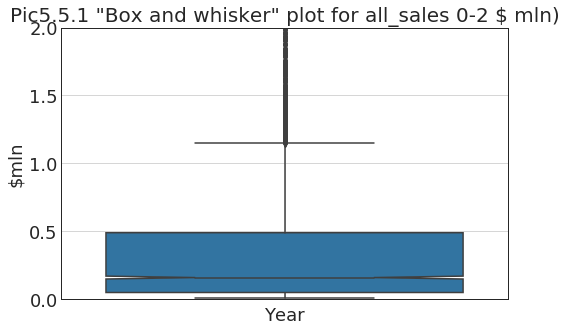

In [89]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df_games_cut, y='all_sales', notch=True)

plt.ylabel('$mln', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.title('Pic5.5.1 "Box and whisker" plot for all_sales 0-80 $ mln', fontsize=20)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_games_cut, y='all_sales', notch=True)

plt.ylim(0, 2)
plt.ylabel('$mln', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.title('Pic5.5.1 "Box and whisker" plot for all_sales 0-2 $ mln)', fontsize=20)
plt.show()

In [90]:
df_games_cut['all_sales'].describe()

count    4225.000000
mean        0.556296
std         1.337852
min         0.010000
25%         0.050000
50%         0.160000
75%         0.490000
max        21.820000
Name: all_sales, dtype: float64

Видно, что медиана значительно смещена ближе к "0". Таким образом, большинство игр имеют продажи близкие к 0\\$ mln, основная часть игр имеют продажи до 1\\$ mln. Видно, что у распределения очень большой хвост, то есть ряд факторов повлияли на повяление лидеров продаж - исключений из общих правил-границ "усов". __Наша задача как раз отыскать данные закономерности, которые выделяются статистически.__

Посомтрим на распеределение средних и медианных продаж для разных платформ

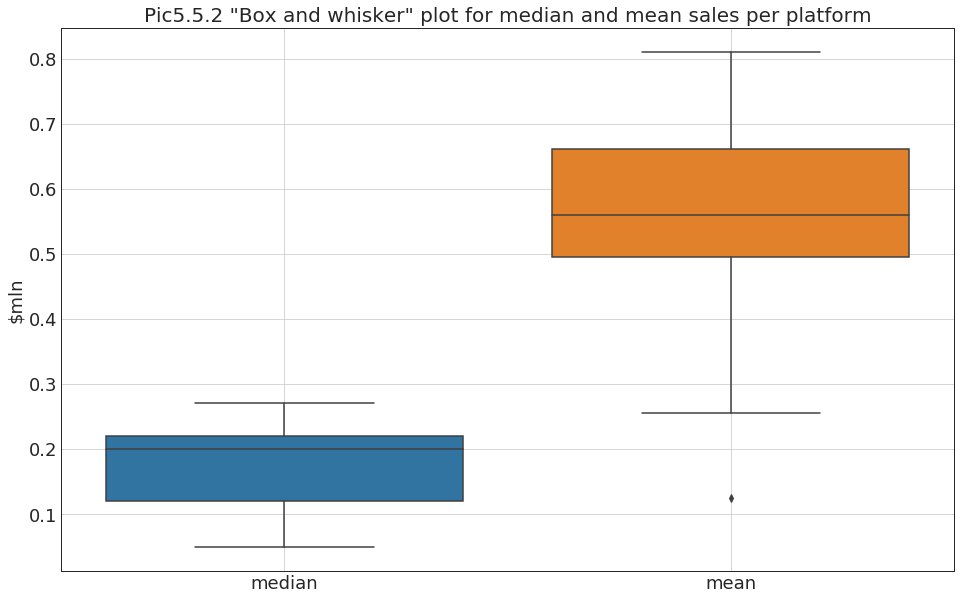

Unique platforms: 9


In [91]:
plt.figure(figsize=(16,10))

platform_sales_mean_median = df_games_cut.groupby('platform')['all_sales'].agg({'mean', 'median'})

sns.boxplot(data=platform_sales_mean_median)
plt.ylabel('$mln', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.title('Pic5.5.2 "Box and whisker" plot for median and mean sales per platform', fontsize=20)
plt.show()
print('Unique platforms:', len(df_games_cut['platform'].unique()))

Видим, что имеется 1 выброс по среднему значению (по приставке PSV) и средние значения превышают медианные - гистограмма правоскошенная. PSV является переносной и старой консолью. Возможно, на нее вышло много пиратских игр или цены игр на данную платформу значительно ниже.

In [92]:
platform_sales_mean_median[platform_sales_mean_median['mean'] == platform_sales_mean_median['mean'].min()]

median      mean
platform                  
PSV         0.05  0.125431

Построим диаграммы размаха с разбивкой по платформам

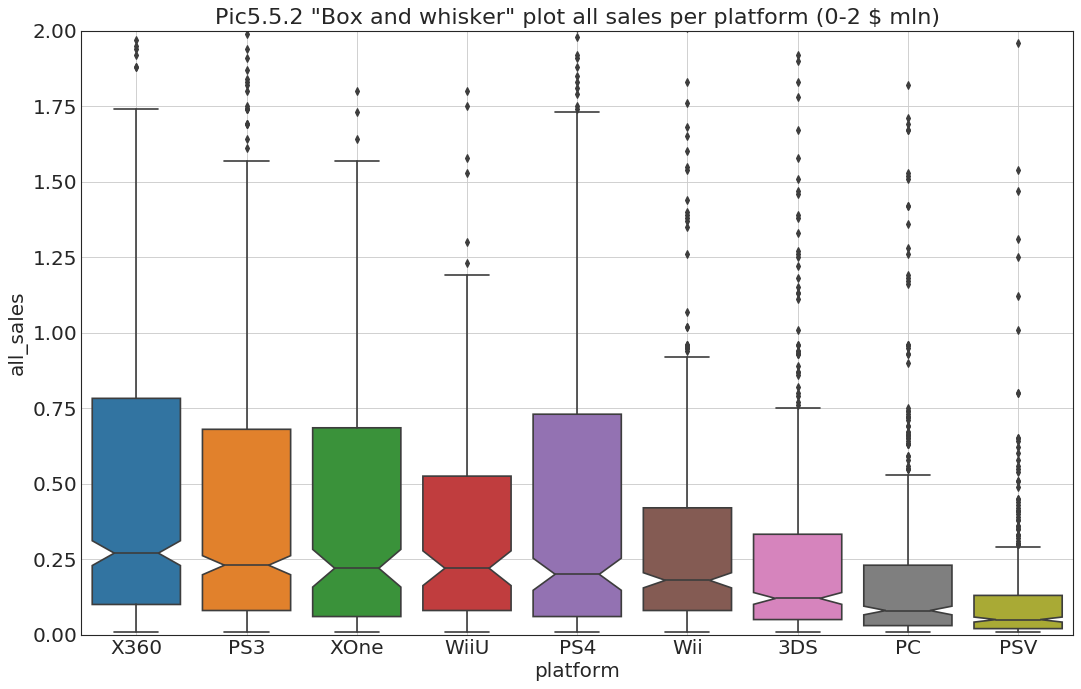

In [93]:
# to sort values by median
order=df_games_cut.groupby('platform')['all_sales'].median().sort_values(ascending=False).index.values
order_2015 = (df_games_cut.query('year_of_release == 2015').groupby('platform')['all_sales']
                   .median().sort_values(ascending=False).index.values)

# Draw Plot
plt.figure(figsize=(16,10), dpi = 80)
sns.boxplot(x='platform', y='all_sales', data=df_games_cut, notch=True, order=order)

plt.grid(True)
plt.title('Pic5.5.2 "Box and whisker" plot all sales per platform', fontsize=20)
plt.show()

plt.figure(figsize=(16,10), dpi = 80)
sns.boxplot(x='platform', y='all_sales', data=df_games_cut, notch=True, order=order)
plt.ylim(0, 2)

plt.grid(True)
plt.title('Pic5.5.2 "Box and whisker" plot all sales per platform (0-2 $ mln)', fontsize=20)
plt.show()

plt.figure(figsize=(16,10), dpi = 80)
sns.boxplot(x='platform', y='all_sales', data=df_games_cut.query('year_of_release == 2015'), order=order_2015)
plt.ylim(0, 2)

plt.grid(True)
plt.title('Pic5.5.3 "Box and whisker" plot all sales per platform for 2015 (0-2 $ mln)', fontsize=20)
plt.show()

__Рис.5.5.2 (последние 7 лет)__
Видно 2 кластера платформ: с относительно высокими средними значениями и большими размахами значений ("ящиком" и "усами") до платформы PS4 включительно и после нее ряд платформ с меньшими медианными значениями и размахом "усов". Их распределения отличаются между собой из-за разных стадий продаж платформ.  
__Рис.5.5.3 (2105 год)__   
Также можно выделить 2 кластера: платформы __XOne, WiiU, PS4, X360__ и остальные. Первые 3 платформы - относительно новые. Также видно, игры для плафтормы __WiiU__ имеют средние продажи без особых исключений игр с высокими продажами. Судя по поведению на рис.5.5.2 - 5.5.3, платформа __X360__ также переживает свой спад в связи с устареванием платформы.    
__Общее__    
Распределения успешных платформ выглядят более размашистыми. Создается вплечатление, что успех платформ складывается больше в частностях - играх между 3-им персентилем и верним концом "усов".

__Таким образом__:    
Платформы __Wii__ выглядят менее прибыльными относительно других. Лучше всего делать упор на платформы __XOne__ и __PS4__ (подтверждаем прежние мысли).

### 5.6. Studying user_score and critic_score impact on sales

В качестве анализа влияния _user_score_ и _critic_score_ на продажи выберем одну из популярных платформ. Для выбора обратимся к списку популярных платформ _popular_platforms_ и к графику Pic4.3.2.1 и вспомним, для каких платформ в каком проценте отсутствовал рейтинг среди этих платформ.

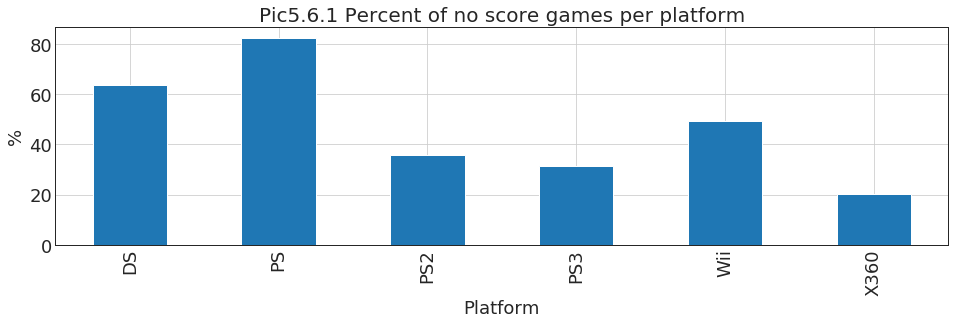

In [94]:
(
    (empty_scores[empty_scores['platform'].isin(popular_platforms.index)]
     .groupby('platform')['platform']
     .count() / platforms_cnt_all[platforms_cnt_all.index.isin(popular_platforms.index)] * 100)
    .plot.bar(figsize=(16, 4), grid=True)
)
plt.ylabel('%', fontsize=18)
plt.xlabel('Platform', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.title('Pic5.6.1 Percent of no score games per platform', fontsize=20)
plt.show()

Итого видим, что минимальный процент отсутсвующих данных характерен для платформы __X360__ (20%), затем для __PS3__(30%) и __PS2__ (35%). Соответсвенно для анализа возьмем платформу X360, для проверки PS3 и PS2.

Посмотрим на данные для платформы X360

user_score  critic_score
count  945.000000    894.000000
mean     6.680741     68.685682
std      1.443971     15.090421
min      0.700000     19.000000
25%      5.900000     59.000000
50%      7.000000     71.000000
75%      7.800000     80.000000
max      9.000000     98.000000

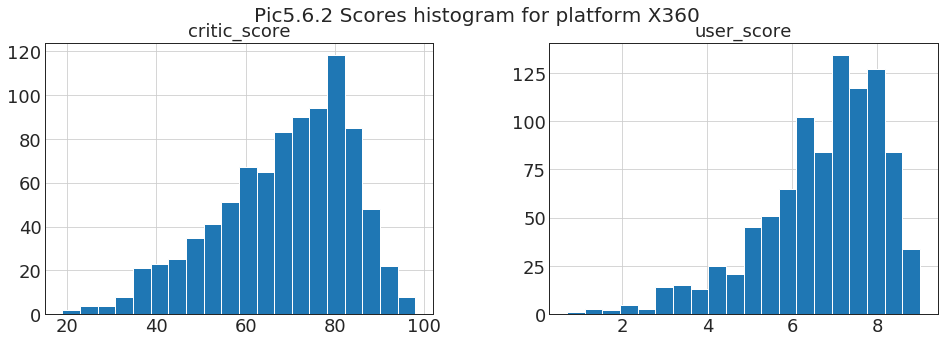

In [95]:
df_games_X360 = df_games.query('platform == "X360"')
display(df_games_X360[['user_score', 'critic_score']].describe())
df_games_X360.hist(column=['user_score', 'critic_score'],
                   figsize=(16, 5),
                   grid=True,
                   xlabelsize=18,
                   bins=20)

plt.suptitle('Pic5.6.2 Scores histogram for platform X360', fontsize=20)
plt.show()

Видим, что распределения чуть скошены влево (по графикам и значениям среднего и медианы)

all_sales
count  1232.000000
mean      0.780227
std       1.632122
min       0.010000
25%       0.110000
50%       0.280000
75%       0.770000
max      21.820000

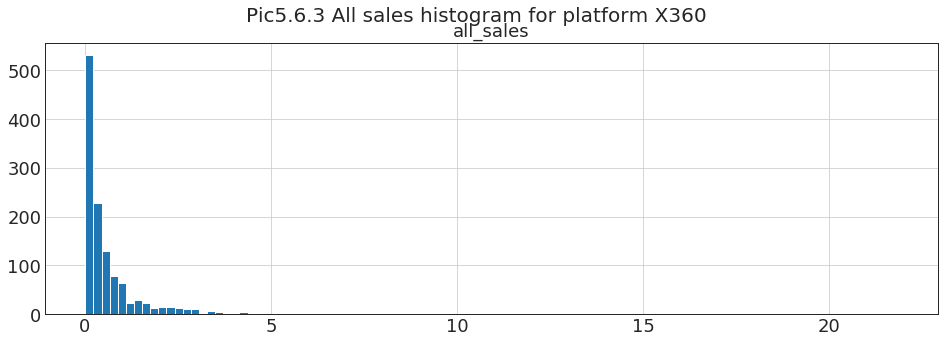

In [96]:
display(df_games_X360[['all_sales']].describe())
df_games_X360.hist(column=['all_sales'],
                   figsize=(16, 5),
                   grid=True,
                   xlabelsize=18,
                   bins=100)

plt.suptitle('Pic5.6.3 All sales histogram for platform X360', fontsize=20)
plt.show()

Видим, что распределениe значительно скошено вправо (по графикам и значениям среднего и медианы).    
Попробуем также построить распределение для значений, больше средних. 

In [97]:
df_games_X360_ab_avg = df_games_X360.query('all_sales > 0.78')

Построим диаграммы распределения для оценок критиков и и пользователей относительно продаж

In [98]:
def distribution_diagram_plot(df, ytitle, kind, ax, x, y, xlabel, ylabel, alpha):
    """
    Функция для отрисовки графиков
    """
    df.plot(kind=kind,
            x=x,
            y=y,     
            grid=True,      
            ax=ax,     
            alpha=alpha,
            fontsize=18
           )
    
    ax.set_title(ytitle, fontdict={'fontsize': 20})
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)  

In [99]:
# Определим функцию для отрисовки диаграммы распределния, так как будем также строить диаграммы для других платформ
def plot_score_sales_distr_diagram(df_games, title, filtered_criteria=None, df_games_filtered=None):
    
    if df_games_filtered is not None:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2 * 8, 2 * 5))
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(2 * 8, 1 * 5))

    distribution_diagram_plot(df_games, 'User Score for all data',
                              'scatter', axes[0,0], 'user_score', 'all_sales', 'Sales, $mln', 'User Score', 0.2)
    distribution_diagram_plot(df_games, 'Critic Score for all data',
                              'scatter', axes[0,1], 'critic_score', 'all_sales', 'Sales, $mln', 'Critic Score', 0.2)
    
    if df_games_filtered is not None:
        distribution_diagram_plot(df_games_filtered, f'User Score for {filtered_criteria}',
                                  'scatter', axes[1,0], 'user_score', 'all_sales', 'Sales, $mln', 'User Score', 0.2)
        distribution_diagram_plot(df_games_filtered, f'Critic Score for {filtered_criteria}',
                                  'scatter', axes[1,1], 'critic_score', 'all_sales', 'Sales, $mln', 'Critic Score', 0.2)


    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    fig.show()

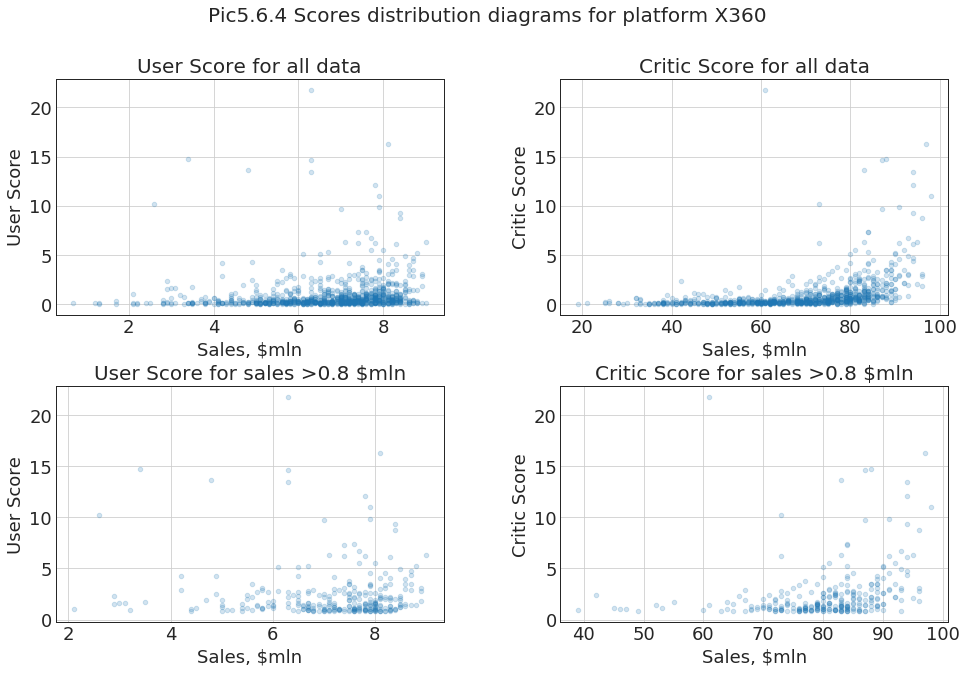

In [100]:
plot_score_sales_distr_diagram(df_games=df_games_X360,
                               title='Pic5.6.4 Scores distribution diagrams for platform X360',
                               filtered_criteria='sales >0.8 $mln',
                               df_games_filtered=df_games_X360_ab_avg)

Видно, что:
* малые продажи не влияют значительно на распределение
* вероятность получить большие продажи выше при высоких рейтигах пользователей/критиков
* рейтинг критиков имеет более выраженную зависимость   

Расчитаем корреляцию между рейтингами и продажами

In [101]:
# Определим функцию для расчета коэффициентов корреляций, так как будем также строить диаграммы для других платформ
def print_score_sales_pirson(df_games, platform_name, filtered_criteria=None, df_games_filtered=None):
    print(f'Коэффициент корреляции Пирсона для платформы {platform_name} для всех данных')
    print('\tКоэффициент user_score - sales', round(df_games['all_sales']
                                                .corr(df_games['user_score']), 2))
    print('\tКоэффициент critic_score - sales', round(df_games['all_sales']
                                                  .corr(df_games['critic_score']), 2))
    
    if df_games_filtered is not None:
        print('_________________________________________________________________')

        print(f'Коэффициент корреляции Пирсона для платформы {platform_name} для {filtered_criteria}')
        print('\tКоэффициент user_score - sales', round(df_games_filtered['all_sales']
                                                    .corr(df_games_filtered['user_score']), 2))
        print('\tКоэффициент critic_score - sales', round(df_games_filtered['all_sales']
                                                      .corr(df_games_filtered['critic_score']), 2))

In [102]:
print_score_sales_pirson(df_games=df_games_X360,
                         platform_name='X360',
                         filtered_criteria='продаж >0.8 $mln',
                         df_games_filtered=df_games_X360_ab_avg
                        )

Коэффициент корреляции Пирсона для платформы X360 для всех данных
	Коэффициент user_score - sales 0.11
	Коэффициент critic_score - sales 0.39
_________________________________________________________________
Коэффициент корреляции Пирсона для платформы X360 для продаж >0.8 $mln
	Коэффициент user_score - sales -0.05
	Коэффициент critic_score - sales 0.27


Видим, что __слабая связь есть между critic_score и продажами__. Для остальных случаев либо связи нет, либо связь сложна.   
Проверим данные выкладки на платформах PS3 и PS2.

Посомтрим на соотношение статистических данных для платформ X360, PS3, PS2.

In [103]:
# Фильтруем значения пустых рейтингов для корректной оценки
display(df_games[(df_games['platform'].isin(['X360', 'PS3', 'PS2'])) & (df_games['user_score'].notnull())]
        .groupby('platform')[['user_score', 'all_sales']]
        .describe())

display(df_games[(df_games['platform'].isin(['X360', 'PS3', 'PS2'])) & (df_games['critic_score'].notnull())]
        .groupby('platform')[['critic_score', 'all_sales']]
        .describe())

user_score                                              all_sales  \
              count      mean       std  min  25%  50%  75%  max     count   
platform                                                                     
PS2          1220.0  7.625328  1.309017  1.7  7.0  8.0  8.6  9.5    1220.0   
PS3           861.0  6.719512  1.463300  0.2  6.0  7.1  7.8  9.1     861.0   
X360          945.0  6.680741  1.443971  0.7  5.9  7.0  7.8  9.0     945.0   

                                                               
              mean       std   min   25%   50%     75%    max  
platform                                                       
PS2       0.805746  1.398955  0.01  0.16  0.39  0.8625  20.81  
PS3       0.963031  1.631535  0.01  0.21  0.50  1.0300  21.05  
X360      0.940624  1.796804  0.01  0.17  0.38  0.9300  21.82

critic_score                                                      \
                count       mean        std   min   25%   50%   75%   max   
platform                                                                    
PS2            1275.0  68.714510  13.039551  24.0  60.0  70.0  78.0  97.0   
PS3             804.0  70.468905  14.050267  13.0  61.0  73.0  81.0  98.0   
X360            894.0  68.685682  15.090421  19.0  59.0  71.0  80.0  98.0   

         all_sales                                                      
             count      mean       std   min   25%   50%    75%    max  
platform                                                                
PS2         1275.0  0.769827  1.376386  0.01  0.14  0.34  0.805  20.81  
PS3          804.0  0.982475  1.671726  0.01  0.20  0.50  1.050  21.05  
X360         894.0  0.961085  1.835480  0.01  0.17  0.39  0.950  21.82

__Прослеживается прямая зависимость между медианой оценки критиков и медианой продаж и их квартилями. Связи с пользовательским рейтингом не наблюдается__.    
Например:   
Для PS3: медиана оценки критиков = 73, квартили 61 и 81, для продаж 0.5, 0.2 и 1.05 соответсвенно.   
Для X360: медиана оценки критиков = 71, квартили 59 и 80, для продаж 0.17, 0.39 и 0.95 соответсвенно.   
Также прослеживается связь между средними значениями, но менее устойчивая.

Посмотрим на диаграмму распределения для платформы PS3  и коэффициенты Пирсона для платформы PS3 и PS2:

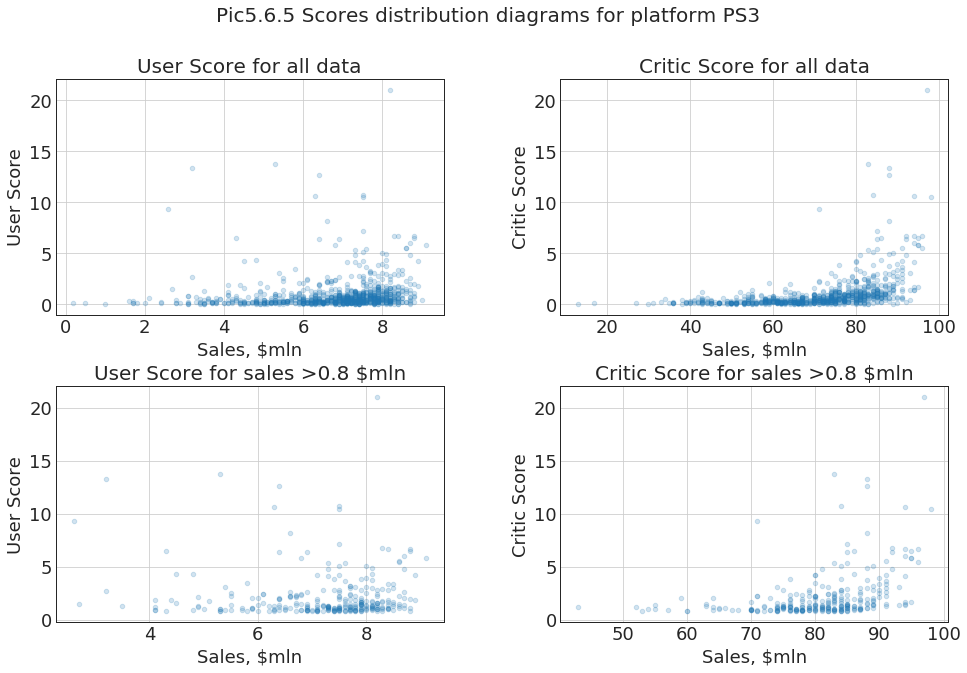

In [104]:
plot_score_sales_distr_diagram(df_games=df_games.query('platform == "PS3"'),
                               title='Pic5.6.5 Scores distribution diagrams for platform PS3',
                               filtered_criteria='sales >0.8 $mln',
                               df_games_filtered=df_games.query('platform == "PS3" and all_sales > 0.78'))

In [105]:
print_score_sales_pirson(df_games=df_games.query('platform == "PS3"'),
                         platform_name='PS3',
                         filtered_criteria='продаж >0.8 $mln',
                         df_games_filtered=df_games.query('platform == "PS3" and all_sales > 0.78'))

Коэффициент корреляции Пирсона для платформы PS3 для всех данных
	Коэффициент user_score - sales 0.13
	Коэффициент critic_score - sales 0.43
_________________________________________________________________
Коэффициент корреляции Пирсона для платформы PS3 для продаж >0.8 $mln
	Коэффициент user_score - sales -0.06
	Коэффициент critic_score - sales 0.38


In [106]:
print_score_sales_pirson(df_games=df_games.query('platform == "PS2"'),
                         platform_name='PS2',
                         filtered_criteria='продаж >0.8 $mln',
                         df_games_filtered=df_games.query('platform == "PS2" and all_sales > 0.78'))

Коэффициент корреляции Пирсона для платформы PS2 для всех данных
	Коэффициент user_score - sales 0.18
	Коэффициент critic_score - sales 0.39
_________________________________________________________________
Коэффициент корреляции Пирсона для платформы PS2 для продаж >0.8 $mln
	Коэффициент user_score - sales 0.14
	Коэффициент critic_score - sales 0.32


Видим, что наши выводы по X360 также подтвердились и по PS2, PS3.   
__Наблюдается слабая корреляция между оценкой критиков и продажами__. Получается, что при выборе игры __покупатели больше доверяют оценке критиков, чем самих пользователей__. Также большое значение имеет то, что оценки покупателей появляются после выхода игры со временем, а оценки критиков, полагаю, выходят до выпуска игры в массовую продажу. Таким образом, основной этап рапространения игр происходит на основе рейтинга критиков.

Также проверим данные выводы для многообещающих платформ PS4 и XOne

In [107]:
print_score_sales_pirson(df_games=df_games_cut.query('platform in ["PS4", "XOne"]'),
                         platform_name='PS4 and XOne')

Коэффициент корреляции Пирсона для платформы PS4 and XOne для всех данных
	Коэффициент user_score - sales -0.04
	Коэффициент critic_score - sales 0.39


Выводы подтверждаются.

### 5.7. Studying genre impact on sales

Посомтрим на количество игр и продажи для различных жанров. Также выведем удельные характеристики продаж, что характеризует, насколько в среднем одна игра данного жанра принесет прибыль (для магазина интеренсны именно игры с высокой удельной прибылью, к тому же игры с высокой удельной прибылью скорее всего будут себя вести стабильней на рынке из-за прибыли производителей).

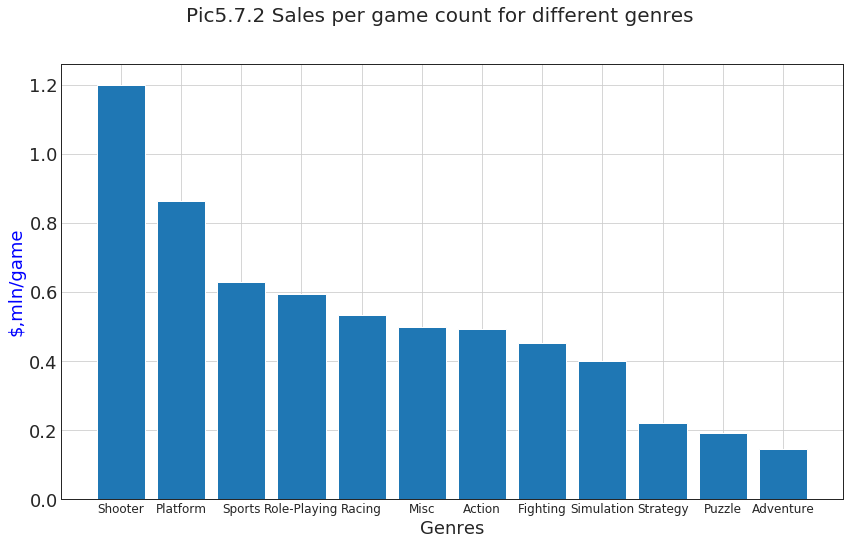

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

genre_sum_and_count = (
    df_games_cut
    .groupby('genre')['all_sales']
    .agg({'sum', 'count'})
    .sort_values(by='sum', ascending=False)
)

set_axes(axes=axes,
         x=genre_sum_and_count.index,
         y1=genre_sum_and_count['sum'],
         ax1label='Sales',
         y1lable='$, mln',
         ytitle=None,
         xtitle='Genres',
         y2=genre_sum_and_count['count'],
         ax2label='Counts',
         y2label='Counts',
         xfontsize=12
        )
    
    
fig.suptitle('Pic5.7.1 Sales and games count for different genres', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

genre_sum_and_count['spec_genre_sales'] = genre_sum_and_count['sum'] / genre_sum_and_count['count']

set_axes(axes=axes,
         x=genre_sum_and_count['spec_genre_sales'].sort_values(ascending=False).index,
         y1=genre_sum_and_count['spec_genre_sales'].sort_values(ascending=False),
         ax1label='Specific sales',
         y1lable='$,mln/game',
         ytitle=None,
         xtitle='Genres',
         xfontsize=12
        )
    
    
fig.suptitle('Pic5.7.2 Sales per game count for different genres', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()

Из Pic5.7.1 - Pic5.7.2 видно, что:
* Самые популярные жанры с наибольшими суммарными продажами - __action, shooter и sports__
* Самые высокие удельные продажи у __platform и shooter__
* Низие продажи у __strategy, puzzle, adventure, fighting, simulation__. Из них __adventure, startegy и puzzzle__ имеют низкие удельные показатели. 

Уточним, действительно ли это так для перспективных ныне платформ PS4 и XOne за последнее время (за исключением аномального 2016 года)

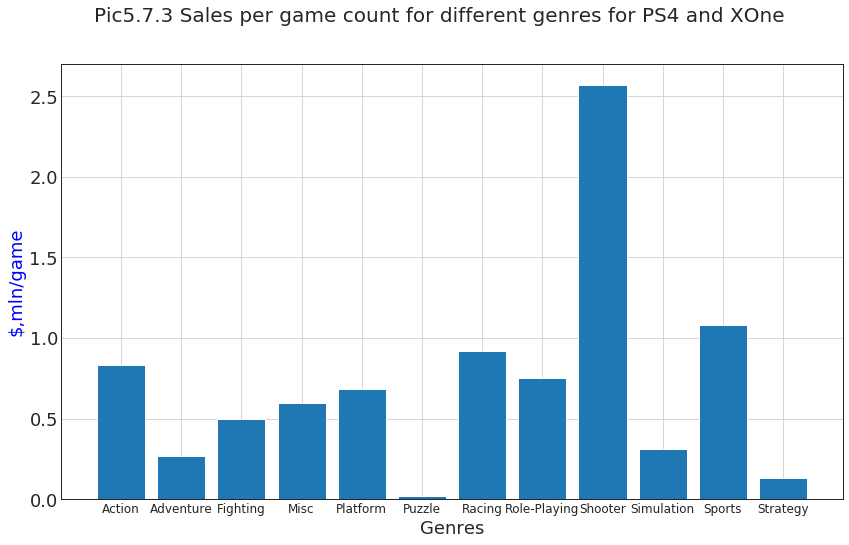

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

genre_sum_and_count_premissive_platform = (
    df_games_cut.query('platform in ["PS4", "XOne"] and year_of_release != 2016')
    .groupby('genre')['all_sales']
    .agg({'sum', 'count'})
)

set_axes(axes=axes,
         x=genre_sum_and_count_premissive_platform.index,
         y1=genre_sum_and_count_premissive_platform['sum'],
         ax1label='Sales',
         y1lable='$, mln',
         ytitle=None,
         xtitle='Genres',
         y2=genre_sum_and_count_premissive_platform['count'],
         ax2label='Counts',
         y2label='Counts',
         xfontsize=12
        )
    
    
fig.suptitle('Pic5.7.1 Sales and games count for different genres', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

set_axes(axes=axes,
         x=genre_sum_and_count_premissive_platform.index,
         y1=genre_sum_and_count_premissive_platform['sum'] / genre_sum_and_count_premissive_platform['count'],
         ax1label='Specific sales',
         y1lable='$,mln/game',
         ytitle=None,
         xtitle='Genres',
         xfontsize=12
        )
    
    
fig.suptitle('Pic5.7.3 Sales per game count for different genres for PS4 and XOne', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()

Видим, что выводы схожи с общими и для перспективныех платформ:
* Самые популярные жанры с наибольшими суммарными продажами - action и shooter
* Самые высокие удельные продажи у shooter   
* Низие продажи у puzzle, strategy, simulation, adventure, fighting, platform. Из них puzzle, startegy, adventire, simulation имеют низкие удельные показатели.

Таким образом, жанр __shooter__ является наиболее многообещающим. Также жанр __action__ и __sports__ можно отметить как прибыльными. __Puzzle, startegy, adventire, simulation__ являются __рискованными__ жанрами для продажи.

Для указанных 3-х жанров посмотрим распределение по годам для наблюдения каких-либо тенденций

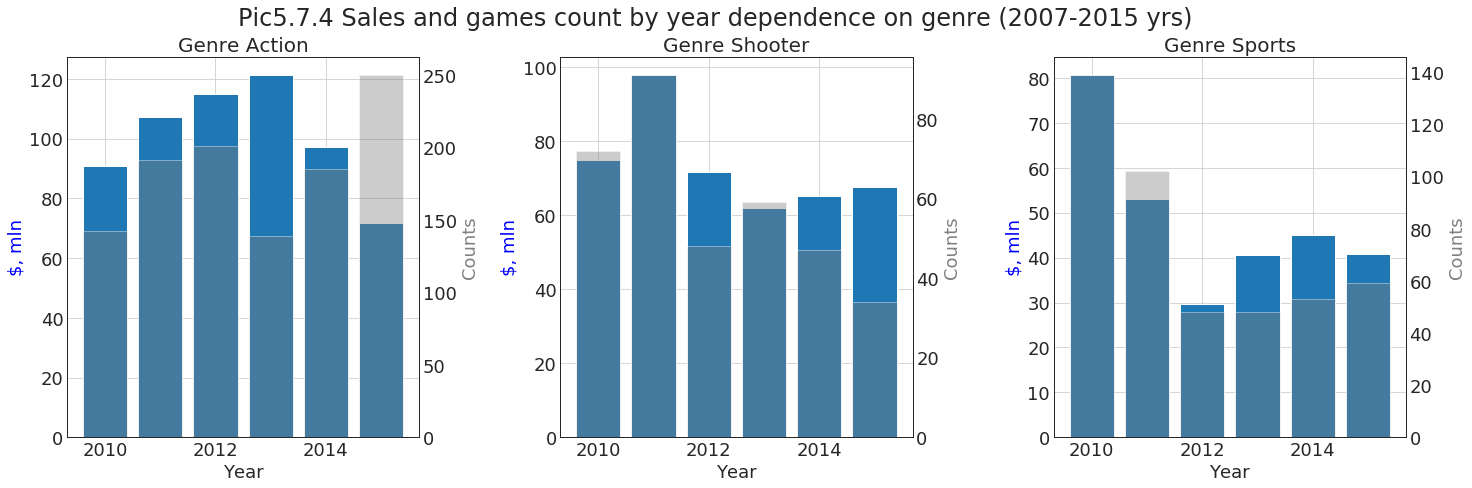

In [110]:
nrows = 1
ncols = 3


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
for idx, name in enumerate(['Action', 'Shooter', 'Sports']):
    
    # Создадим DataFrame по каждой платформе с данными по продажам за каждый год
    genre_by_years = (
        df_games_cut
        .query("genre == @name and year_of_release != 2016")
        .groupby('year_of_release')['all_sales']
        .agg({'sum', 'count'})
    )
    
    # Зададим оси
    set_axes(axes=axes[idx],
             x=genre_by_years.index,
             y1=genre_by_years['sum'],
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'Genre {name}',
             xtitle='Year',
             y2=genre_by_years['count'],
             ax2label='Counts',
             y2label='Counts'
            )
    

# Выведем на экран результаты
fig.suptitle('Pic5.7.4 Sales and games count by year dependence on genre (2007-2015 yrs)', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

Видно, что __shooter__ ведет себя наиболее стабильно и многообещающе в последнее время. __Sports__ также стабилен, но наблюдается резкое падение продаж после 2009 года. Жанр __action__ имеет тенденцию к понижению объема продаж.

### 5.8. Studying ESRB raiting impact on sales

Посмотрим на влияние рейтинга ESRB на продажи игр

In [111]:
# Для записи топ-4
top_4_esrb_all = []

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
sales_and_esrb_rating = (
    df_games_cut
    .query('year_of_release != 2016')
    .groupby('rating')['all_sales']
    .agg({'sum', 'count'})
    .sort_values('sum', ascending=False))
    
# Зададим оси
set_axes(axes=axes,
         x=sales_and_esrb_rating.index,
         y1=sales_and_esrb_rating['sum'],
         ax1label='Sales',
         y1lable='$, mln',
         ytitle='Pic5.8.1 Sales and counts by ESRB rating',
         xtitle='ESRB rating',
         y2=sales_and_esrb_rating['count'],
         ax2label='Counts',
         y2label='Counts',      
         xfontsize=18,
         labelrotation=0
        )

# Запишем топ-4
top_4_esrb_all = sales_and_esrb_rating.index[:4].to_list()

# Выведем на экран результаты
fig.show()

Видим, что наибольшими продажами за последнее время обладает рейтинг E (для всех). Наибольшим удельным показателем обладает рейтинг M (17+): на вскидку в 2 раза превышающие остальные рейтинги.    
Давайте посмотрим на тренд рейтингов за последнее время для выявления тенденций.

In [112]:
nrows = 1
ncols = 4


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 10))
for idx, name in enumerate(top_4_esrb_all):
    
    # Создадим DataFrame по каждому жанру с данными по продажам за каждый год
    sales_and_esrb_rating = (
        df_games_cut
        .query('rating == @name and year_of_release != 2016')
        .groupby('year_of_release')['all_sales']
        .agg({'sum', 'count'}))
    
    # Зададим оси
    set_axes(axes=axes[idx],
             x=sales_and_esrb_rating.index,
             y1=sales_and_esrb_rating['sum'],
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'Rating ESRB {name}',
             xtitle='Year',
             y2=sales_and_esrb_rating['count'],
             ax2label='Counts',
             y2label='Counts'
            )
    

# Выведем на экран результаты
fig.suptitle('Pic5.8.2 Sales and games count by year dependence on rating (2007-2015 yrs)', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

__Видим, что несмотря превышающие суммарные объемы продаж игр с рейтингом E, идет заметный спад по их объемам за последнее время. За последнее время рейтинг M показывает наибольшие продажи, но не факт, что такой тренд сохранится в ближайшее время.__

## 6. Create a user profile for each region

Рассматриваемые регионы - _NA, EU, JP_

 ### 6.1. Top-5 platforms

Вспомним список перспективных платформ.

In [113]:
promising_platforms

year_of_release         delta
                     min     max      
platform                              
3DS               2011.0  2016.0   6.0
PS4               2013.0  2016.0   4.0
PSV               2011.0  2016.0   6.0
WiiU              2012.0  2016.0   5.0
XOne              2013.0  2016.0   4.0

Из них платформы __PS4, XOne__ являются многообещающими, __WiiU__ идет следующей, затем __3DS__ и __PSV__ (градация по времени существования платформ). При этом всего 5 платформ являются перспективными. Для корректного анализа проанализируем результаты по всем платформам (вдруг, были отсеяны популярные для определенного рынка платформы).

Выберем Топ-5 платформ многообещающих платформ среди списка promising_platforms (не устаревшие платформы) в период 2011-2015 года (в промежуток 6 лет - выхода на пик, 2016 год не берем в расчет)

In [114]:
nrows = 1
ncols = 3

# Для записи топ-6
top_6_platforms = {}

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
for idx, name in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    
    sales_by_region = (
        df_games
        .query('2011 <= year_of_release <= 2015')
        .groupby('platform')[name]
        .sum()
        .sort_values(ascending=False))
    
    # Зададим оси
    set_axes(axes=axes[idx],
             x=sales_by_region.index,
             y1=sales_by_region,
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'{name} for each platform',
             xtitle='Platform',
             xfontsize=14,
            )
    
    # Запишем топ-5
    top_6_platforms[name] = sales_by_region.index[:6].to_list()

# Выведем на экран результаты
fig.suptitle('Pic6.1.1 Sales by promissing platforms dependence on region', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

In [115]:
print('Топ-6 платформ для каждого рынка (6, чтобы отследить тенденцию последнего):')
top_6_platforms

Топ-6 платформ для каждого рынка (6, чтобы отследить тенденцию последнего):


{'na_sales': ['X360', 'PS3', 'PS4', 'XOne', '3DS', 'Wii'],
 'eu_sales': ['PS3', 'X360', 'PS4', '3DS', 'PC', 'XOne'],
 'jp_sales': ['3DS', 'PS3', 'PSP', 'PSV', 'WiiU', 'PS4']}

Для каждой 5-ки выведем графики-тренды распределения продаж за последнее время для анализа тенденций для каждого рынка

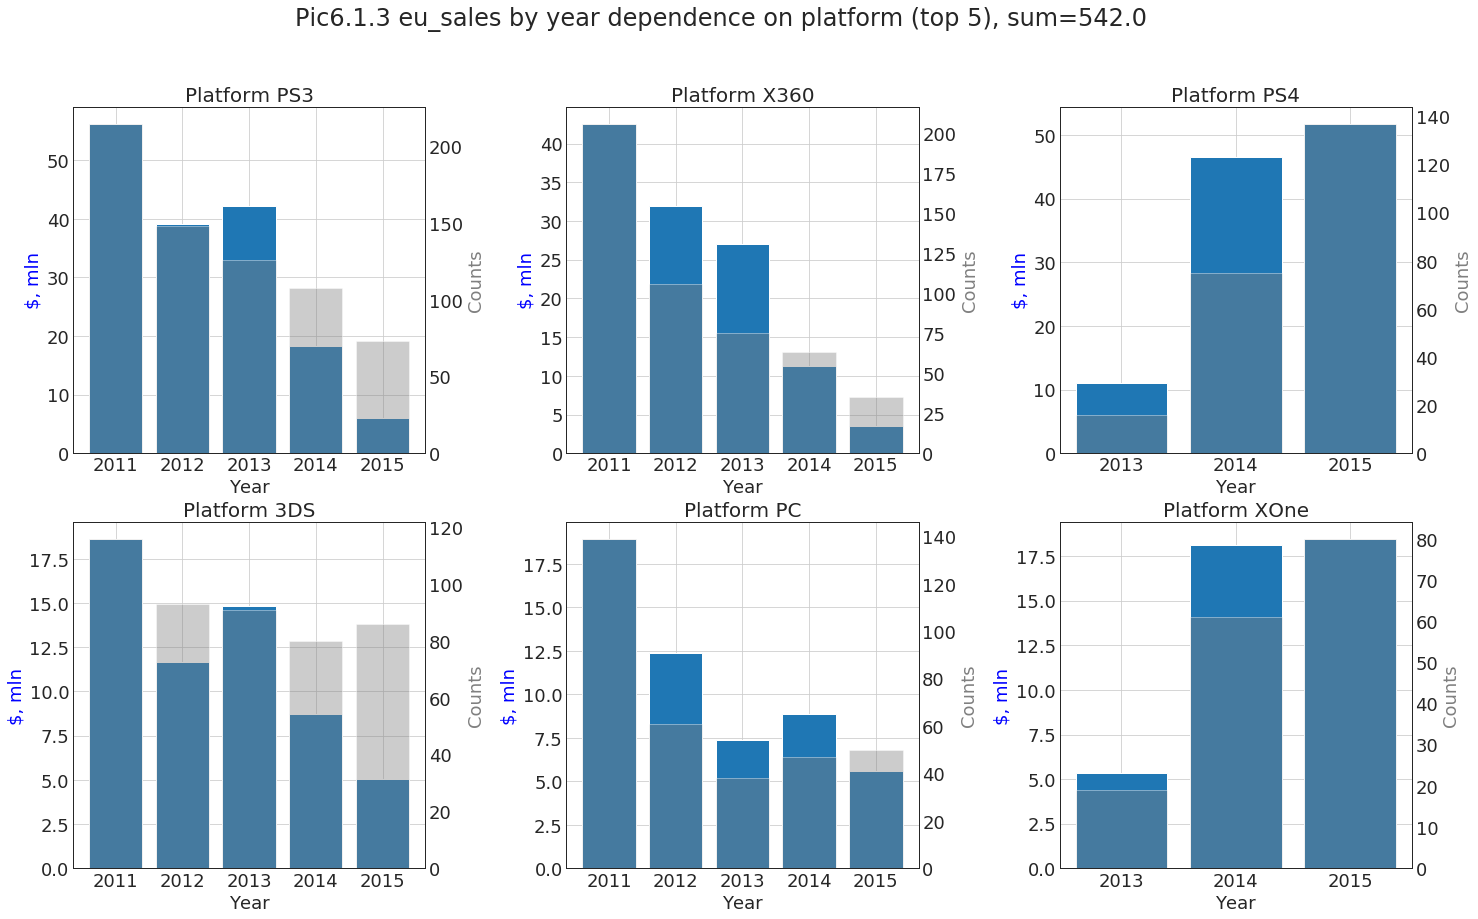

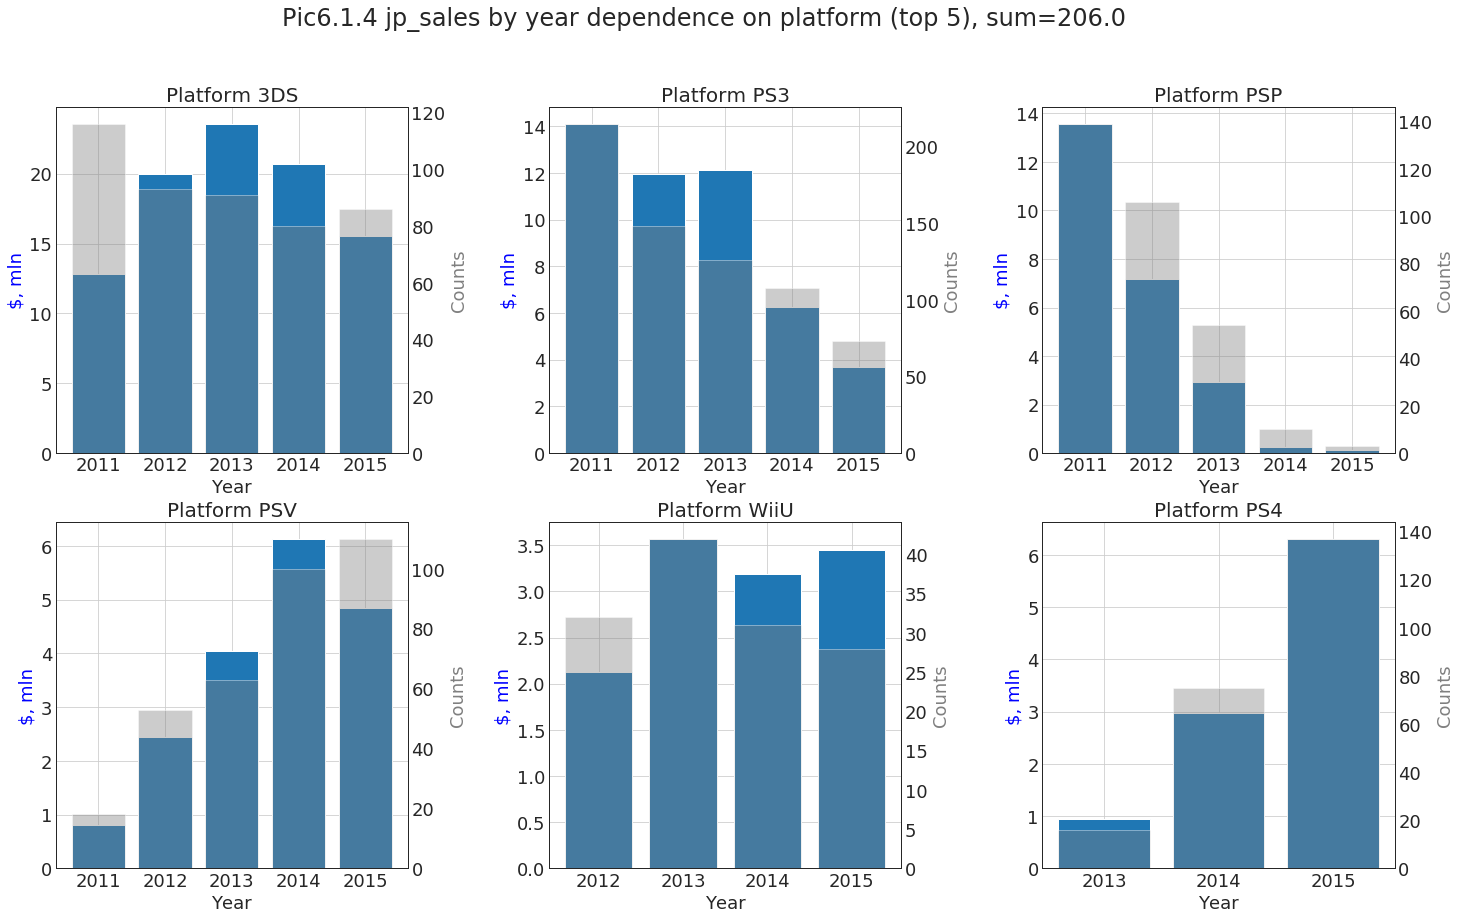

In [116]:
nrows = 2
ncols = 3
k = 1

for name, platforms in top_6_platforms.items():
    k += 1 # Для номера картинки
    summary = 0 # Для сохранения суммарных продаж

    # Для 6 платформ - 6 подграфиков
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
    for idx, platform in enumerate(platforms):
        i = int(idx // ncols)
        j = int(idx % ncols)

        # Создадим DataFrame по каждой платформе с данными по продажам за каждый год
        platform_by_years = (
            df_games
            .query("platform == @platform and (2011 <= year_of_release <= 2015)")
            .groupby('year_of_release')[name]
            .agg({'sum', 'count'})
        )
        
        summary += platform_by_years['sum'].sum()

        set_axes(axes=axes[i, j],
                 x=platform_by_years.index,
                 y1=platform_by_years['sum'],
                 ax1label='Sales',
                 y1lable='$, mln',
                 ytitle=f'Platform {platform}',
                 xtitle='Year',
                 y2=platform_by_years['count'],
                 ax2label='Counts',
                 y2label='Counts'
                )

    # Выведем на экран результаты
    fig.suptitle(f'Pic6.1.{k} {name} by year dependence on platform (top 5), sum={round(summary, 0)}', fontsize=24)
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    fig.show()

__ТОП-5__:   
* Для рынка Северной Америки: X360, PS3, PS4, XOne, 3DS. Из них __наиболее перспективные PS4, XOne, 3DS (продажи на значительном спаде, несмотря на выпуск игр в одинаковом количестве за последнее время)__.
* Для рынка Европы: PS3, X360, PS4, 3DS, PC. Из них наиболее перспективны __PS4 и 3DS (продажи на значительном спаде, несмотря на выпуск игр в одинаковом количестве за последнее время)__.
* Для рынка Японии: 3DS, PS3, PSP, PSV, WiiU. Из них наиболее перспективны __3DS и PSV__ (обе платформы, видимо, только прошли пик продаж), __WiiU__. Видно, что Япония превержена к переносным консолям (__3DS, PSP, PSV__).
* Самые большие продажи в Северной Америке

Общий вывод среди стран:
* Наиболее многообещающей платформой для всех рынков является __PS4__ - входит в большинство ТОП-5 и не прошла пик продаж.
* Каждый рынок имеет сови особенности и различия, отличных от других (в Америке одна из самых популярных и многообещающих платформ XOne не характерна для ТОП-5 других рынков; в Японии на пике популярности PSV и 3DS, когда как для других рынков пик уже заметно спал).
* Судя по распределениям общий тренд в приставках задает Америка, затем подхватывает Европа и затем Япония. Можно ожидать рост популярности платформы XOne для Европы в ближайшее время (аналогично текущей ситуации в Америке) и затухание платформ PSV и 3DS для Японии (для остальных рынков затухание уже произошло). С другой стороны веяния внутреннего рынка Японии на переносные консоли (3DS, PSP, PSV) следует также учитывать.

### 6.2. Top-5 genres

Выберем Топ-5 популярных жанров среди топ-5 популярных платформ

In [117]:
nrows = 1
ncols = 3

# Для записи топ-6
top_6_genres = {}

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
for idx, name in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    
    sales_by_region = (
        df_games_cut
        .query('platform in @promising_platforms.index and year_of_release != 2016')
        .groupby('genre')[name]
        .sum()
        .sort_values(ascending=False))
    
    # Зададим оси
    set_axes(axes=axes[idx],
             x=sales_by_region.index,
             y1=sales_by_region,
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'{name} for each genre',
             xtitle='Genre',
             xfontsize=14,
             labelrotation=90
            )
    
    # Запишем топ-5
    top_6_genres[name] = sales_by_region.index[:6].to_list()

# Выведем на экран результаты
fig.suptitle('Pic6.1.5 Sales by genres dependence on region', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

In [118]:
print('Топ-6 жанров для каждого рынка (6, чтобы отследить тенденцию последнего):')
top_6_genres

Топ-6 жанров для каждого рынка (6, чтобы отследить тенденцию последнего):


{'na_sales': ['Action',
  'Shooter',
  'Role-Playing',
  'Sports',
  'Platform',
  'Racing'],
 'eu_sales': ['Action',
  'Shooter',
  'Sports',
  'Role-Playing',
  'Platform',
  'Racing'],
 'jp_sales': ['Role-Playing',
  'Action',
  'Platform',
  'Simulation',
  'Misc',
  'Fighting']}

Для каждой 5-ки выведем графики-тренды распределения продаж за последнее время для анализа тенденций для каждого рынка

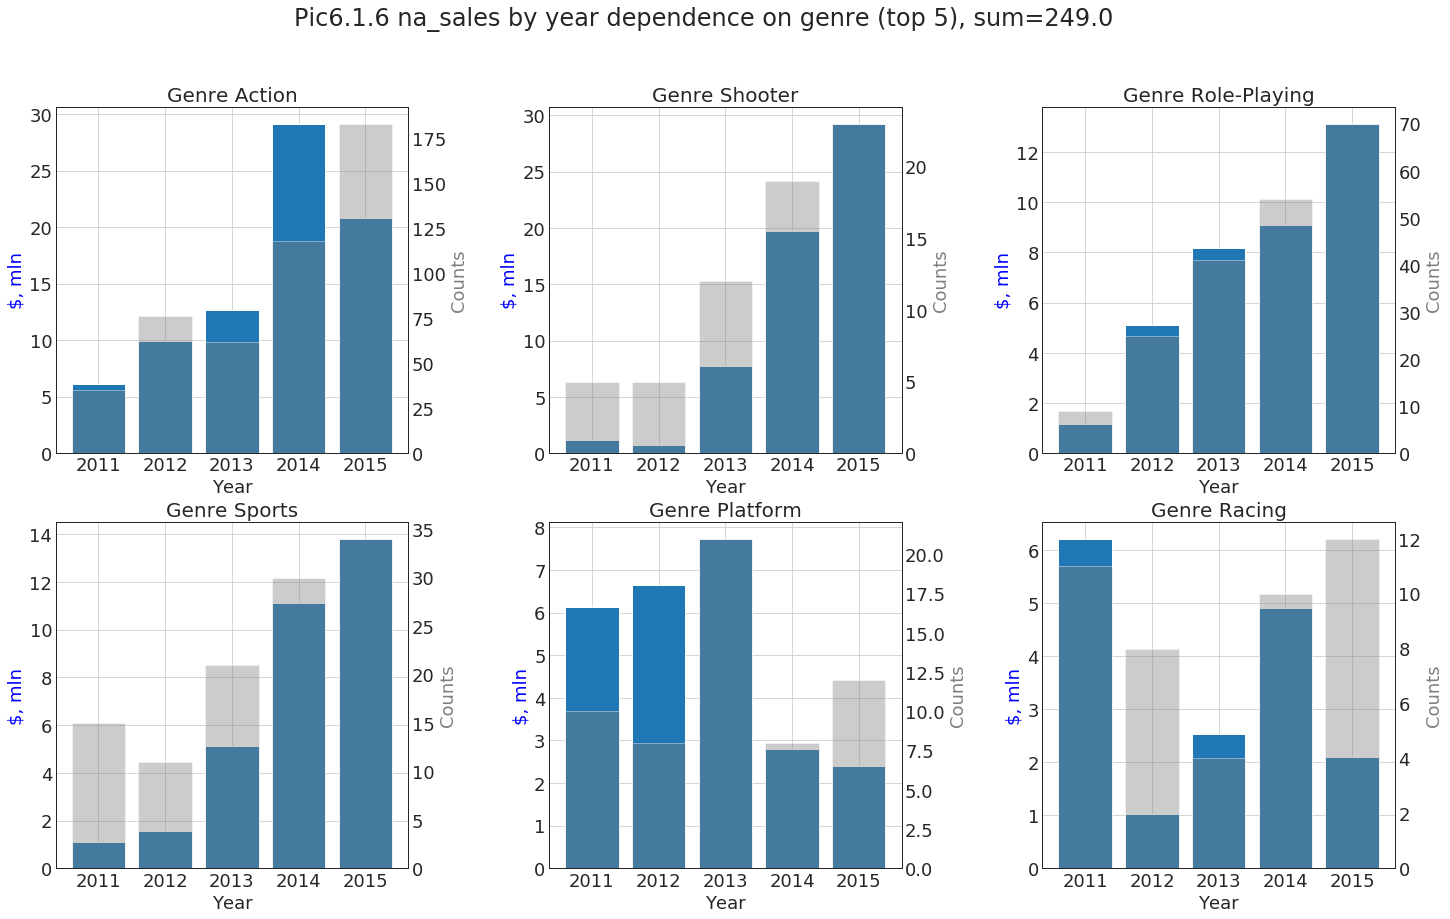

In [119]:
nrows = 2
ncols = 3
k = 5

for name, genres in top_6_genres.items():
    k += 1 # Для номера картинки
    summary = 0 # Для сохранения суммарных продаж

    # Для 6 платформ - 6 подграфиков
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
    for idx, genre in enumerate(genres):
        i = int(idx // ncols)
        j = int(idx % ncols)

        # Создадим DataFrame по каждой платформе с данными по продажам за каждый год
        genre_by_years = (
            df_games_cut
            .query("genre == @genre and platform in @promising_platforms.index and year_of_release != 2016")
            .groupby('year_of_release')[name]
            .agg({'sum', 'count'})
        )
        
        summary += genre_by_years['sum'].sum()

        set_axes(axes=axes[i, j],
                 x=genre_by_years.index,
                 y1=genre_by_years['sum'],
                 ax1label='Sales',
                 y1lable='$, mln',
                 ytitle=f'Genre {genre}',
                 xtitle='Year',
                 y2=genre_by_years['count'],
                 ax2label='Counts',
                 y2label='Counts'
                )

    # Выведем на экран результаты
    fig.suptitle(f'Pic6.1.{k} {name} by year dependence on genre (top 5), sum={round(summary, 0)}', fontsize=24)
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    fig.show()

__ТОП-5__:   
* Для рынка Северной Америки: Action, Shooter, Sports, Misc, Role-playing. Из них __Action и Misc идут на спад__.
* Для рынка Европы: Action, Shooter, Sports, Misc, Racing. Из них __Action и Misc возможно идут спад, а Role-Playing скорее всего войдет в ТОП-5 в ближайший год__.
* Для рынка Японии: Role-playing, Action, Sports, Platform, Misc. Рынок выглядит нестабильным из-за периодических резких скачков различных жанров. __Жанры Sports и Platform идут на понижение популярности__

Общий вывод среди стран:
* Американский и Европейский рынки ведут себя похоже.
* Японский рынок отличается от остальных и выглядит нестабильным относительно популярных жанров. Связано это с популярностью аниме -> популярность Role-playing, а платформенные игры популярны в связи с популярностью переносных консолей 3DS, PSV, PSP. Скачки в популярности тех или иных жанров скорее всего обусловлены глобальным веяниям на стационарные консоли. Таким образом, наблюдается скачки спросов то на игры для стационарных консолей, то на игры для переносных консолей.

### 6.3. ESRB rating influence

Помним, что большая часть игр не имеет проставленного рейтинга.

In [120]:
df_games_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 14 to 16441
Data columns (total 12 columns):
name               4225 non-null object
platform           4225 non-null object
year_of_release    4225 non-null float64
genre              4225 non-null object
na_sales           4225 non-null float64
eu_sales           4225 non-null float64
jp_sales           4225 non-null float64
other_sales        4225 non-null float64
critic_score       2178 non-null float64
user_score         2382 non-null float64
rating             2743 non-null object
all_sales          4225 non-null float64
dtypes: float64(8), object(4)
memory usage: 589.1+ KB


Давайте попробуем разобраться с этим. Взглянем на распределение данных с рейтингом и без.

In [121]:
df_games_cut[df_games_cut['rating'].isna()]['all_sales'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])

0.01    0.0100
0.25    0.0300
0.50    0.0700
0.75    0.1900
0.99    4.1985
Name: all_sales, dtype: float64

In [122]:
(df_games_cut[df_games_cut['rating'].isna()]['all_sales'].quantile([0.01, 0.25, 0.5, 0.75, 0.99]))

0.01    0.0100
0.25    0.0300
0.50    0.0700
0.75    0.1900
0.99    4.1985
Name: all_sales, dtype: float64

Видим, что отбросить значения на основе низких продаж безрейтинговых игр не получится.    
Попробуем заменить рейтинги с рейтингов игр с других платформ, но с таким же именем.

Соберем все имена и рейтинги известных игр

In [123]:
with_rating_names = (df_games_cut[df_games_cut['rating'].notnull()].drop_duplicates(subset=['name'])[['name', 'rating']])

Сколько всего потенциально можно изменить таким способом?

In [124]:
df_games_cut[(df_games_cut['rating'].isna()) & (df_games_cut['name'].isin(with_rating_names['name']))]['name'].count()

145

Произведем замену

In [125]:
# Имеется warning. Как убрать - не знаю.
pd.set_option('chained_assignment', None) # чтобы убрать warning
df_games_cut.loc[:, 'rating'] = df_games_cut['name'].map(with_rating_names.set_index('name')['rating'])

Получаем следующее (заполнили 145 пропусков).

In [126]:
df_games_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 14 to 16441
Data columns (total 12 columns):
name               4225 non-null object
platform           4225 non-null object
year_of_release    4225 non-null float64
genre              4225 non-null object
na_sales           4225 non-null float64
eu_sales           4225 non-null float64
jp_sales           4225 non-null float64
other_sales        4225 non-null float64
critic_score       2178 non-null float64
user_score         2382 non-null float64
rating             2888 non-null object
all_sales          4225 non-null float64
dtypes: float64(8), object(4)
memory usage: 589.1+ KB


Итого еще много пропусков.   
Посомтрим, есть ли зависимость между жанром и рейтингом.

In [127]:
# Жанры с пустыми занчениями
df_games_cut[df_games_cut['rating'].isna()].groupby('genre')['name'].count()

genre
Action          418
Adventure       204
Fighting         32
Misc            168
Platform         17
Puzzle           17
Racing           41
Role-Playing    171
Shooter          53
Simulation       55
Sports          102
Strategy         59
Name: name, dtype: int64

In [128]:
# Распределение по рейтингам и жанрам
df_games_cut.pivot_table(index='genre', columns='rating', values='name', aggfunc='count')

rating            E   E10+   EC      M   RP      T
genre                                             
Action         94.0  204.0  NaN  316.0  NaN  254.0
Adventure      12.0   23.0  NaN   53.0  NaN   32.0
Fighting        NaN    5.0  NaN   21.0  NaN  111.0
Misc           95.0   82.0  4.0    5.0  NaN   72.0
Platform       45.0   62.0  NaN    NaN  NaN    6.0
Puzzle         26.0    8.0  NaN    NaN  NaN    3.0
Racing        118.0   37.0  NaN    5.0  NaN   21.0
Role-Playing    4.0   16.0  NaN  107.0  NaN  139.0
Shooter         NaN   29.0  NaN  249.0  NaN   67.0
Simulation     43.0    5.0  NaN    2.0  NaN   49.0
Sports        299.0   37.0  NaN    NaN  NaN   59.0
Strategy       10.0   17.0  NaN    7.0  1.0   34.0

Видим, что наблюдается закономерность между жанром и рейтингом.    
Заполним пропуски на основе вероятности рейтингов по жанрам по известным значениям.

In [129]:
# функция заполнения
def fillna_with_norm_genre(df, genre, to_replace):
    ratings = df[(df['genre'] == genre) & df[to_replace].notnull()].groupby(to_replace)['name'].count()
    m = (df['genre'] == genre) & (df[to_replace].isna())
    
    df.loc[m, to_replace] = df[m][to_replace].fillna(pd.Series(np.random.choice(pd.unique(ratings.index), 
                                                   m.sum(),
                                                   p=(ratings / ratings.sum()).values),
                           index=df.loc[m].index))
    return df

In [130]:
for genre in pd.unique(df_games_cut[df_games_cut['rating'].isna() & df_games_cut['genre'].notnull()]['genre']):
    df_games_cut = fillna_with_norm_genre(df_games_cut, genre, 'rating')

In [131]:
df_games_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 14 to 16441
Data columns (total 12 columns):
name               4225 non-null object
platform           4225 non-null object
year_of_release    4225 non-null float64
genre              4225 non-null object
na_sales           4225 non-null float64
eu_sales           4225 non-null float64
jp_sales           4225 non-null float64
other_sales        4225 non-null float64
critic_score       2178 non-null float64
user_score         2382 non-null float64
rating             4225 non-null object
all_sales          4225 non-null float64
dtypes: float64(8), object(4)
memory usage: 589.1+ KB


Видим, что удалось заполнить значения.

Рассмотрим распределение ESRB рейтинга среди топ-5 популярных платформ

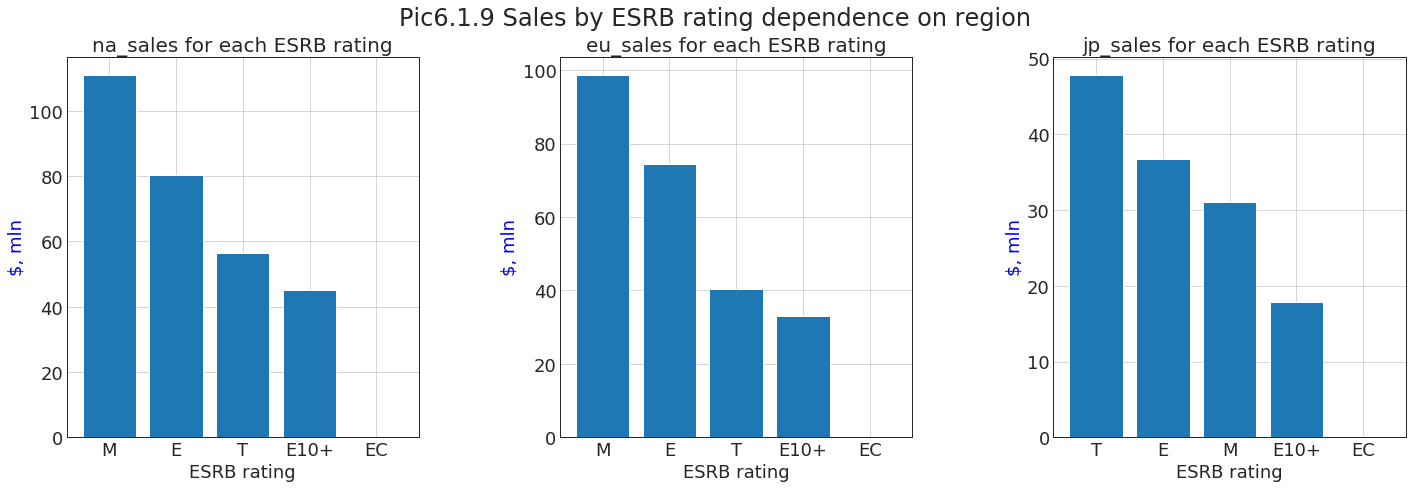

In [132]:
nrows = 1
ncols = 3

# Для записи топ-4
top_4_esrb = {}

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 7))
for idx, name in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    
    sales_by_region = (
        df_games_cut
        .query('platform in @promising_platforms.index and year_of_release != 2016')
        .groupby('rating')[name]
        .sum()
        .sort_values(ascending=False))
    
    # Зададим оси
    set_axes(axes=axes[idx],
             x=sales_by_region.index,
             y1=sales_by_region,
             ax1label='Sales',
             y1lable='$, mln',
             ytitle=f'{name} for each ESRB rating',
             xtitle='ESRB rating',
             xfontsize=18,
             labelrotation=0
            )
    
    # Запишем топ-4
    top_4_esrb[name] = sales_by_region.index[:4].to_list()

# Выведем на экран результаты
fig.suptitle('Pic6.1.9 Sales by ESRB rating dependence on region', fontsize=24)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.show()

Выведем графики-тренды распределения продаж за последнее время для анализа тенденций для каждого рынка

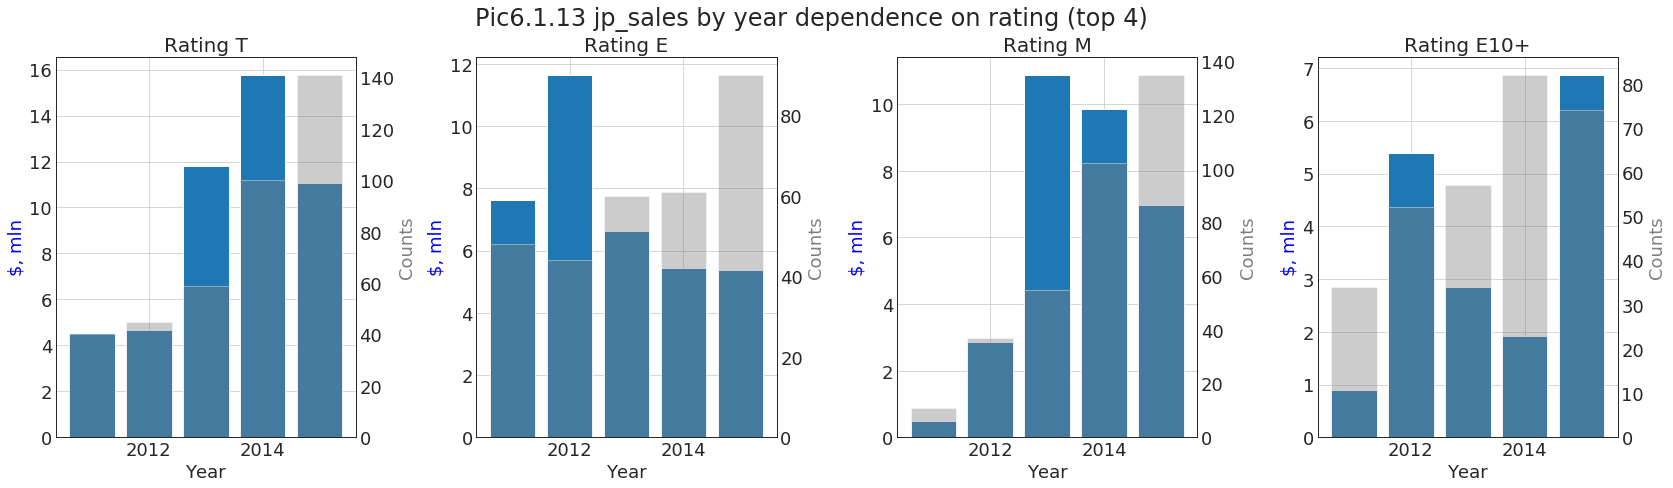

In [133]:
nrows = 1
ncols = 4
k = 10

for name, ratings in top_4_esrb.items():
    k += 1 # Для номера картинки

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 7, nrows * 7))
    for idx, rating in enumerate(ratings):

        # Создадим DataFrame по каждой платформе с данными по продажам за каждый год
        genre_by_years = (
            df_games_cut
            .query("rating == @rating and platform in @promising_platforms.index and year_of_release != 2016")
            .groupby('year_of_release')[name]
            .agg({'sum', 'count'})
        )
        

        set_axes(axes=axes[idx],
                 x=genre_by_years.index,
                 y1=genre_by_years['sum'],
                 ax1label='Sales',
                 y1lable='$, mln',
                 ytitle=f'Rating {rating}',
                 xtitle='Year',
                 y2=genre_by_years['count'],
                 ax2label='Counts',
                 y2label='Counts'
                )

    # Выведем на экран результаты
    fig.suptitle(f'Pic6.1.{k} {name} by year dependence on rating (top 4)', fontsize=24)
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    fig.show()

Общий вывод среди стран:
* __Рейтинг ESRB влияет на продажи в отдельных регионах__.
* Американский и Европейский рынки ведут себя похоже. В основном популярны игры для возраста 17+ (рейтинг М).
* __Японский рынок__ отличается от остальных и выглядит нестабильным. __Рейтиги T, E, M__ имеют почти одинаковые суммарные продажи, при этом, судя по трендам рис.6.1.13, тяжело что-то ожидать.  В целом, __E10+__ показал себя за последний год лучше остальных, но устойчивого тренда не видно. __В случае с Японским рынком на данном этапе не следует воспринимать рейтинг ESRB.__

__Итого японский рынок отличается от американского и европейского. Американский и Европейских похожи друг на друга. Поэтому следует учитвать платформы, жанры и рейтинги ESRB при работе с тем или иным рынком.__ Рекомендации были даны в данной главе выше.

## 7. Statistic research

Проведем статистический анализ пользовательского рейтинга и рейтинга критиков в различных жанрах, чтобы понаблюдать изменение рейтингов.   

Выведем гистограммы плотностей рейтингов.

In [134]:
# Это для меня на память:-)
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', 
#                                                        '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8',
#                                                        '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94',
#                                                        '#f7b6d2', '#dbdb8d', '#9edae5', '#ad494a', '#8c6d31'])

# default_cycler = (cycler(color=plt.cm.Paired.colors) *
#                   cycler(linestyle=['-', '--', ':', '-.']))

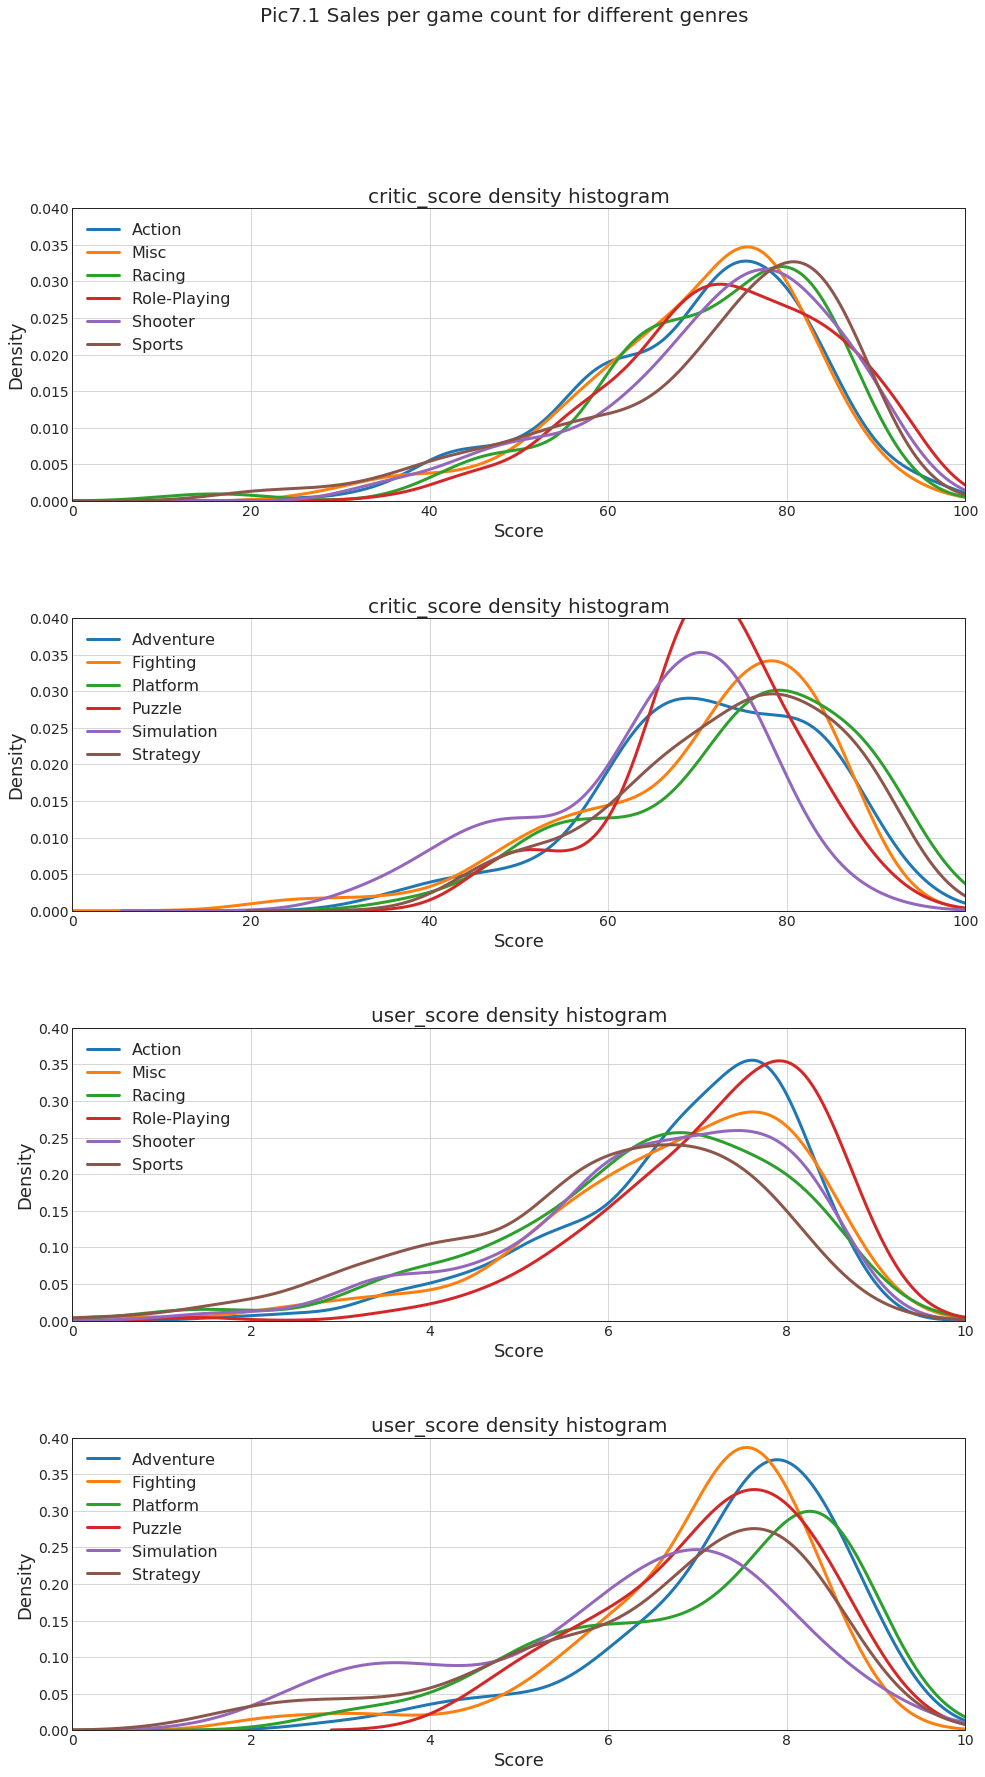

In [135]:
# Значения для отображения
all_genres = df_games_cut.groupby('genre')['all_sales'].sum().sort_values(ascending=False).index
scores = ['critic_score', 'user_score']

# Границы осей для различных оценок
xranges = [(0, 100), (0, 10)]
yranges = [(0, 0.04), (0, 0.4)]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 28))


idx = 0
for score, xrange, yrange in zip(scores, xranges, yranges):
    # Делим жанры на 2 категории, так как тяжело разобрать все на 1-ой картинке
    for genre_group in [all_genres[:6], all_genres[6:]]:
        axes[idx].set_title(f'{score} density histogram', fontdict={'fontsize': 20})
        axes[idx].set_xlabel('Score', fontsize=18) 
        axes[idx].set_ylabel('Density', fontsize=18)
        axes[idx].tick_params(axis='y', which='major', labelsize=18)
        axes[idx].tick_params(axis='x', which='major', labelsize=18, labelrotation=90)
        axes[idx].set_xlim(xrange)
        axes[idx].set_ylim(yrange)

        df_games_cut.query('genre in @genre_group').groupby('genre')[score].plot.kde(ax=axes[idx],
                                                                                     grid=True,
                                                                                     fontsize=14,
                                                                                     linewidth=3,
                                                                                     legend=True)

        axes[idx].legend(fontsize=16)
        idx += 1

# color and style settings
default_cycler = (cycler(color=plt.cm.Paired.colors))
plt.rc('axes', prop_cycle=default_cycler)
# plt.style.use('tableau-colorblind10')
        
fig.suptitle('Pic7.1 Sales per game count for different genres', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()    

Рассчитаем средние значения, медианы, дисперсии и стандартные отклонения

In [136]:
# Статистические значения
score_statistics_by_genre = (df_games_cut[['genre', 'critic_score', 'user_score']]
                             .groupby('genre')
                             .agg(['mean', 'median', 'std', 'var'], axis="columns")
                            )

# Добавим статистику по всем колонкам
score_statistics_by_genre.loc['All'] = [score_statistics_by_genre['critic_score']['mean'].mean(),
                                        score_statistics_by_genre['critic_score']['median'].mean(),
                                        score_statistics_by_genre['critic_score']['std'].mean(),
                                        score_statistics_by_genre['critic_score']['var'].mean(),
                                        score_statistics_by_genre['user_score']['mean'].mean(),
                                        score_statistics_by_genre['user_score']['median'].mean(),
                                        score_statistics_by_genre['user_score']['std'].mean(),
                                        score_statistics_by_genre['user_score']['var'].mean()]
                                        

score_statistics_by_genre = score_statistics_by_genre.round(2)
display(score_statistics_by_genre.style.background_gradient(cmap ='coolwarm'))

Вспомним следущее: Action и Role-playing - самые популярные жанры для соответсвующих рынков (раздел 6.2, а Action самый популярный по всему миру), Shooter - самый многообещающий (раздел 5.7.). Остальные жанры будут указаны в анализе при наличии особенностей в поведении.

__Выводы по статистике critic score__

* У _Action_ одни из самых низких оценок критиков по медиане и среднему значению. Опережает лишь _Simulation_ и _Adventure_.
* У _Shooter_ самое высокое медианное значение и самый большой разброс данных, исходя из стандартного отклонения
* Также высокие показатели оценок критиков у _Role-playing_: максимальное среднее значение, высокая медиана и небольшой разброс данных
* У всех жанров медиана больше среднего значения => гистограммы скошены влево
* __Похоже, что для жанров, идущих на спад, характерно нарастание второго пика на гистограмме и заниженные показатели медианы и среднего значения (Action, Misc, Platform), а для перспективных жанров наоборот (Shooter и Role-playing). Учитывая наличие слабой корреляции между оценкой критиков и продажами, данный вывод также небезоснователен__ (исходя из п.5.6)

__Вывоы по статистике user score__

* Сильно выбивается из статистики _Role-plaing_, имея наивысшие/лучшие показатели по всем параметрам
* Самые низкие показатели у _Sports_. Также низкие показатели у __Misc__ и __Racing__.
* Остальные распределения более-менее похожи
* Гистограммы скошены влево
* Вспомнив вывод об отсутсвии с корреляцией между продажами и _user_score_, можно в подтверждение сказать, что, исходя из статистических показателей _user_score_ и соответсвующих жанров, также тяжело сделать какой-либо вывод или выдвинуть гипотезу.

__Общее__

* Распределения во всех случаях скошены влево, что говорит о преобладании более высоких оценок, чем их среднее значение
* Оценки довольно похожи друг на друга, но есть ряд отличающихся жанров, которые требуют внимания в будущем

## 8. Hypothesis testing

Проверим следующие 2 гипотезы:

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотезаци формулируется из принципа "ожидания" того, чего мы хотим найти.

__Нулевая гипотеза:__  средние пользовательские указанных платформ рейтинги одинаковые    
__Альтернативная гипотеза:__ средние пользовательские указанных платформ рейтинги разные   
Альтернативная гипотеза характера "не равно" для двух генеральных совокупностей, то есть двусторонняя, а критерий проверки __двусторонний__ по уровню значимости.   
Уровень значимости зададим стандартный - 5%, так как задача не требует высокой точности.

Расчитатем статистические значения для двух распределений и выведем графики распределений

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
count    374.000000
mean       6.518182
std        1.565390
min        1.400000
25%        5.600000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


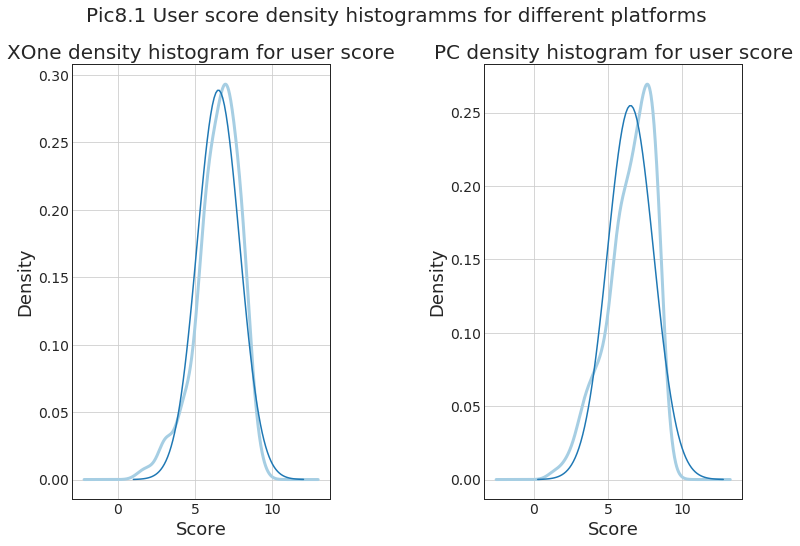

In [137]:
# Значения для отображения
all_genres = df_games_cut.groupby('genre')['all_sales'].sum().sort_values(ascending=False).index
platforms = ['XOne', 'PC']
# Сохраним дисперсии
hyp1_dispersions = {}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

idx = 0
for platform in platforms:
    axes[idx].set_title(f'{platform} density histogram for user score', fontdict={'fontsize': 20})
    axes[idx].set_xlabel('Score', fontsize=18) 
    axes[idx].set_ylabel('Density', fontsize=18)
    axes[idx].tick_params(axis='y', which='major', labelsize=18)
    axes[idx].tick_params(axis='x', which='major', labelsize=18, labelrotation=90)
    
    sample = df_games_cut.query('platform == @platform')['user_score']
    
    print(sample.describe())
    mu = sample.mean()
    variance = sample.var()
    sigma = math.sqrt(variance)
    hyp1_dispersions[platform] = variance
    
    sample.plot.kde(ax=axes[idx], grid=True, fontsize=14, linewidth=3)
    
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    axes[idx].plot(x, st.norm.pdf(x, mu, sigma))
    idx += 1

# color and style settings
default_cycler = (cycler(color=plt.cm.Paired.colors))
plt.rc('axes', prop_cycle=default_cycler)
# plt.style.use('tableau-colorblind10')
        
fig.suptitle('Pic8.1 User score density histogramms for different platforms', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()    

Данные похожи на нормальные распределения, что позволяет применять критерий Стьюдента.   
Видим, что степень свободы больше 30, поэтому t-критерий практически не отличается от стандартного нормального распределения.

Посмтрим на дисперсии

In [138]:
hyp1_dispersions

{'XOne': 1.9069968429360695, 'PC': 2.4504460151108947}

Параметр equal_var = True. Похоже, что выборки взяты из схожих по параметрам совокупностей.

Проведем _t-тест:_

In [139]:
# Зададим уровень статистической значимости
alpha = 0.05

# None значения опустим при подсчете
results = st.ttest_ind(
    df_games_cut.query('platform == "XOne"')['user_score'],
    df_games_cut.query('platform == "PC"')['user_score'],
    nan_policy='omit',
    equal_var=True
)

print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.9809981106491932
Не получилось отвергнуть нулевую гипотезу


Итого, возможно, что пользовательские рейтинги XOne и PC одинаковые. Возможно, что пользовательские рейтинги не зависят от платформ и из поколения в поколения платформ имеют близкое распределение (то есть всегда есть высокооценненные и любимые пользователем игры и наоборот).

### Средние пользовательские рейтинги жанров Action и Sports разные

__Нулевая гипотеза:__  средние пользовательские указанных жанров одинаковые    
__Альтернативная гипотеза:__ средние пользовательские указанных жанров разные  
Альтернативная гипотеза характера "равно" для двух генеральных совокупностей, то есть двусторонняя, а критерий проверки __двусторонний__ по уровню значимости.   
Уровень значимости зададим стандартный - 5%, так как задача не требует высокой точности.

Расчитатем статистические значения для двух распределений и выведем графики распределений

count    753.000000
mean       6.776892
std        1.357367
min        1.600000
25%        6.000000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
count    301.000000
mean       5.878405
std        1.699500
min        0.200000
25%        4.900000
50%        6.200000
75%        7.200000
max        9.000000
Name: user_score, dtype: float64


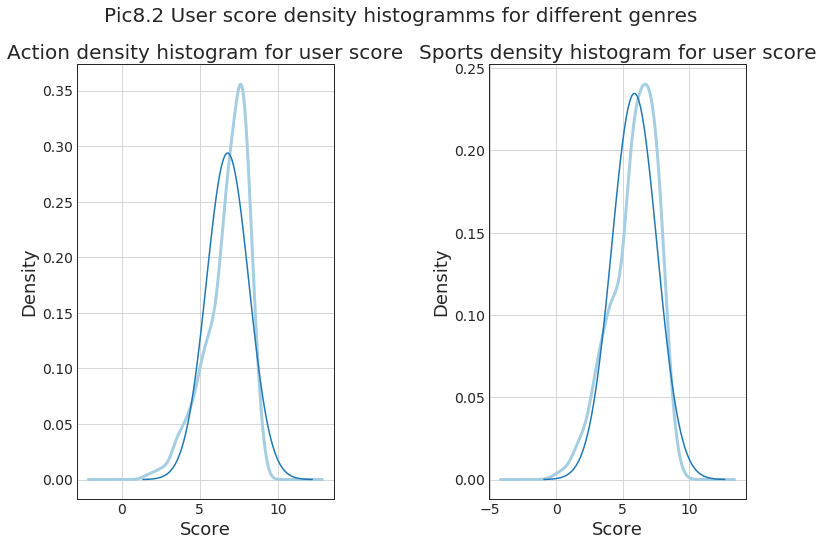

In [140]:
# Значения для отображения
all_genres = df_games_cut.groupby('genre')['all_sales'].sum().sort_values(ascending=False).index
genres = ['Action', 'Sports']
# Сохраним дисперсии
hyp1_dispersions = {}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

idx = 0
for genre in genres:
    axes[idx].set_title(f'{genre} density histogram for user score', fontdict={'fontsize': 20})
    axes[idx].set_xlabel('Score', fontsize=18) 
    axes[idx].set_ylabel('Density', fontsize=18)
    axes[idx].tick_params(axis='y', which='major', labelsize=18)
    axes[idx].tick_params(axis='x', which='major', labelsize=18, labelrotation=90)
    
    sample = df_games_cut.query('genre == @genre')['user_score']
    
    print(sample.describe())
    mu = sample.mean()
    variance = sample.var()
    sigma = math.sqrt(variance)
    hyp1_dispersions[genre] = variance
    
    sample.plot.kde(ax=axes[idx], grid=True, fontsize=14, linewidth=3)
    
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    axes[idx].plot(x, st.norm.pdf(x, mu, sigma))
    idx += 1

# color and style settings
default_cycler = (cycler(color=plt.cm.Paired.colors))
plt.rc('axes', prop_cycle=default_cycler)
# plt.style.use('tableau-colorblind10')
        
fig.suptitle('Pic8.2 User score density histogramms for different genres', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show() 

Данные похожи на нормальные распределения, что позволяет применять критерий Стьюдента.
Видим, что степень свободы больше 30, поэтому t-критерий практически не отличается от стандартного нормального распределения.     
Посмтрим на дисперсии

In [141]:
hyp1_dispersions

{'Action': 1.8424440535729423, 'Sports': 2.8882987818383166}

Параметр equal_var = False: не похоже, что выборки взяты из схожих по параметрам совокупностей.

Проведем _t-тест:_

In [142]:
# Зададим уровень статистической значимости
alpha = 0.05

# None значения опустим при подсчете
results = st.ttest_ind(
    df_games_cut.query('genre == "Action"')['user_score'],
    df_games_cut.query('genre == "Sports"')['user_score'],
    nan_policy='omit',
    equal_var=True
)

print('p-значение: ', results.pvalue)

# Так как нулевая гипотеза с "не", то меняем формулировки местами
if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение:  9.876561346323747e-19
Не получилось отвергнуть нулевую гипотезу


Таким образом, возможно, средние рейтинги Action и Sports одинаковые.

__Таким образом__, гипотеза об схожести средних пользовательских рейтингов платформ Xbox One и PC __не опровергнута__, как и гипотеза о разных средних пользовательских рейтингов жанров Action и Sports.

## 9. Outcome

1. Вопросы для обсуждения с коллегами:   
    1.1. При проверке колонок _critic_sore_ и _user_score_ обнаружилось много постых полей - порядка 48% (п.4.3.2)    
    1.2. При проверке колонки _rating_ обнаружилось много постых полей - порядка 41% (п.4.3.2)      
    1.3. Аномальные данные за 2016 год, что отражается в нехарактерной непропорциональности количества выпущенных игр и продаж (п.5.3)
2. Определяющие успешность игр закономерности:   
    2.1. __Платформа__      
    Характерный период существования платформ 10-12 лет, на пик продаж игр платформы выходят на 4-5ый год существования.    
    2.2. __Рейтинг критиков__   
    Наблюдается слабая прямая корреляция между рейтингом критиков и продажами игр. Корреляцию можно отслеживать по медиане. При высоком рейтинге (в т.ч. пользовательском) вероятность высоких и сверхвысоких продаж выше.   
    2.3. __Жанр__   
    2.4. __Рейтинг ESRB__   
    2.5. __Рынок__   
    В зависимости от рынка (американский, европейский, японский) у покупателей свои предпочтения, что было разобрано в п.6. В целом, рынки Северной Америки и Европы ведут себя похоже, в отличие от рынка Японии.   
3. Рекомендации на 2017 год:    
    3.1. Для мирового рынка __платформы PS4 и XOne набирают популярность__ и находятся около пиковго состояния по продажам игр.   
    3.2. Самый многообещающий жанр - __shooter__. Прибыльными также являются __action__ и __sport__. При этом жанр __action__ идет на спад продаж - его популярность под вопросом.    
    3.3. Рискованными жанрами являются __puzzle, strategy, adventure__ и __simulation__.    
    3.4. __Игры с рейтингом M__ показывают наибольшие продажи за последнее время, когда как продажи E, T, E10+ приблизительно одинаковые (игры с рейтингом E идут на спад).    
    3.5. Профили покупателей для рынков Северной Америки, Европы и Японии - см. п.6.   
4. Остальные важные заметки:   
    4.1. Количество выпущеных игр и продажи находятся в прямой корреляции (коэффициент Пирсона составляет 0.98).    
    4.2. Продажи многих игр близки к 0, лидеры продаж имеют более размашистое распределение с большим распределением игр между  между 3-им персентилем и верним концом "усов" (п.5.5).   
    4.3. Имеются паттерны поведения распределения __critic score__ и жанров, позволяющие предопределить успешные/неуспешные жанры.
    